In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Starting dataset
df = pd.read_csv('customer_dataframe.csv', sep='\t', index_col=0)

selected_features = ['TProd','MeanProdOrder', 'MeanSaleOrder', 'MeanPSale']

df2 = df[selected_features]
df2.head()

,TProd,MeanProdOrder,MeanSaleOrder,MeanPSale
CustomerID,,,,
17850,1702,48.629,151.940,3.960
13047,1355,84.688,193.069,3.926
12583,4978,292.824,389.961,2.140
13748,439,87.800,189.650,3.996
15100,58,9.667,105.850,10.950


In [3]:
df2.describe()

,TProd,MeanProdOrder,MeanSaleOrder,MeanPSale
count,4333.000000,4333.000000,4333.000000,4333.000000
mean,1129.535657,201.104614,327.882896,3.492819
std,4692.695935,274.590134,395.336014,8.997404
min,0.000000,0.000000,-0.000000,0.122000
25%,157.000000,80.500000,155.050000,2.160000
50%,370.000000,140.167000,241.900000,2.834000
75%,971.000000,237.750000,371.560000,3.712000
max,196556.000000,7824.000000,9904.875000,434.650000


# Normalization

In [4]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df2.to_numpy())

# K-MEANS

In [5]:
sse_list = list()
sil_list = list()
davies_list = list()
max_k = 15
for k in tqdm(range(2, max_k + 1), total=max_k - 1, desc="Iterating over possible K values"):
    kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans_iter.fit(df_norm)
    
    davies_list.append(davies_bouldin_score(df_norm, kmeans_iter.labels_))
    sil_list.append(silhouette_score(df_norm, kmeans_iter.labels_))
    sse = kmeans_iter.inertia_
    sse_list.append(sse)

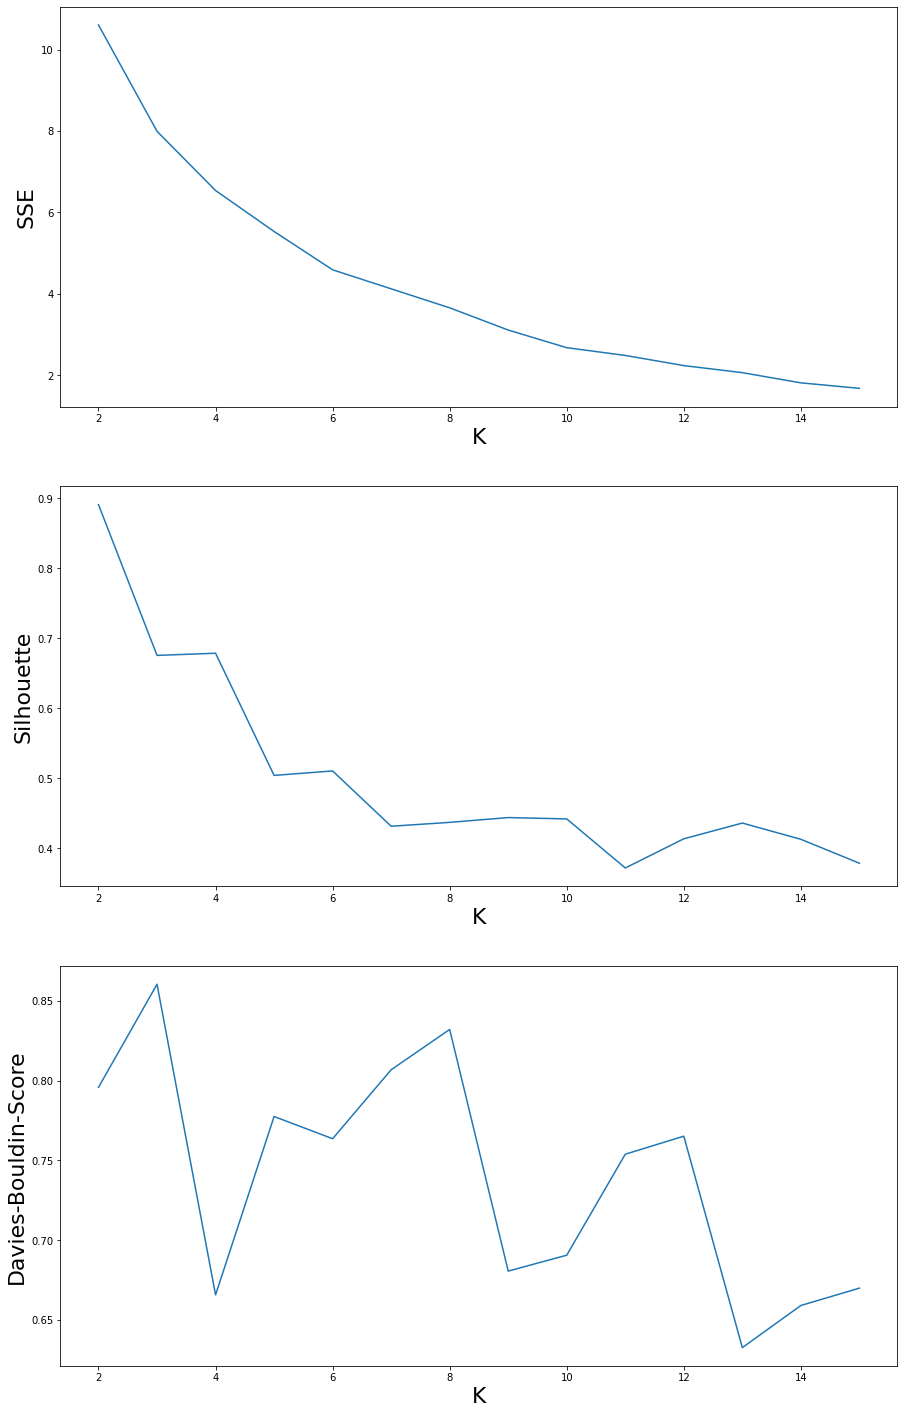

In [6]:
fig, axs = plt.subplots(3,1,figsize=(15,25))
axs[0].plot(range(2, len(sse_list) + 2), sse_list)
axs[0].set_ylabel('SSE', fontsize=22)
axs[0].set_xlabel('K', fontsize=22)
axs[0].tick_params(axis='both', which='major', labelsize=10)

axs[1].plot(range(2, len(sil_list) + 2), sil_list)
axs[1].set_ylabel('Silhouette', fontsize=22)
axs[1].set_xlabel('K', fontsize=22)
axs[1].tick_params(axis='both', which='major', labelsize=10)

axs[2].plot(range(2, len(davies_list) + 2), davies_list)
axs[2].set_ylabel('Davies-Bouldin-Score', fontsize=22)
axs[2].set_xlabel('K', fontsize=22)
axs[2].tick_params(axis='both', which='major', labelsize=10)

In [23]:
k = 4
kmeans = KMeans(n_clusters=k, n_init=100)
kmeans.fit(df_norm)

KMeans(n_clusters=4, n_init=100)

In [24]:
print("SSE:",sse_list[k-2]," - SILHOUETTE:",sil_list[k-2])

SSE: 6.538689611545757  - SILHOUETTE: 0.6785957622596556


In [25]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
clust_dict = dict(zip(bins, hist))

print(clust_dict)

#saving anomalous cluster index
anomalous_cluster = -1

for key, value in dict(zip(bins, hist)).items():
    if value == 1:
        anomalous_cluster = key

{0: 3857, 1: 1, 2: 25, 3: 450}


**We can already start seeing an anomalous cluster, composed only by 1 value, let us analyze more the situation**

Text(0.5, 0, 'MeanSaleOrder')

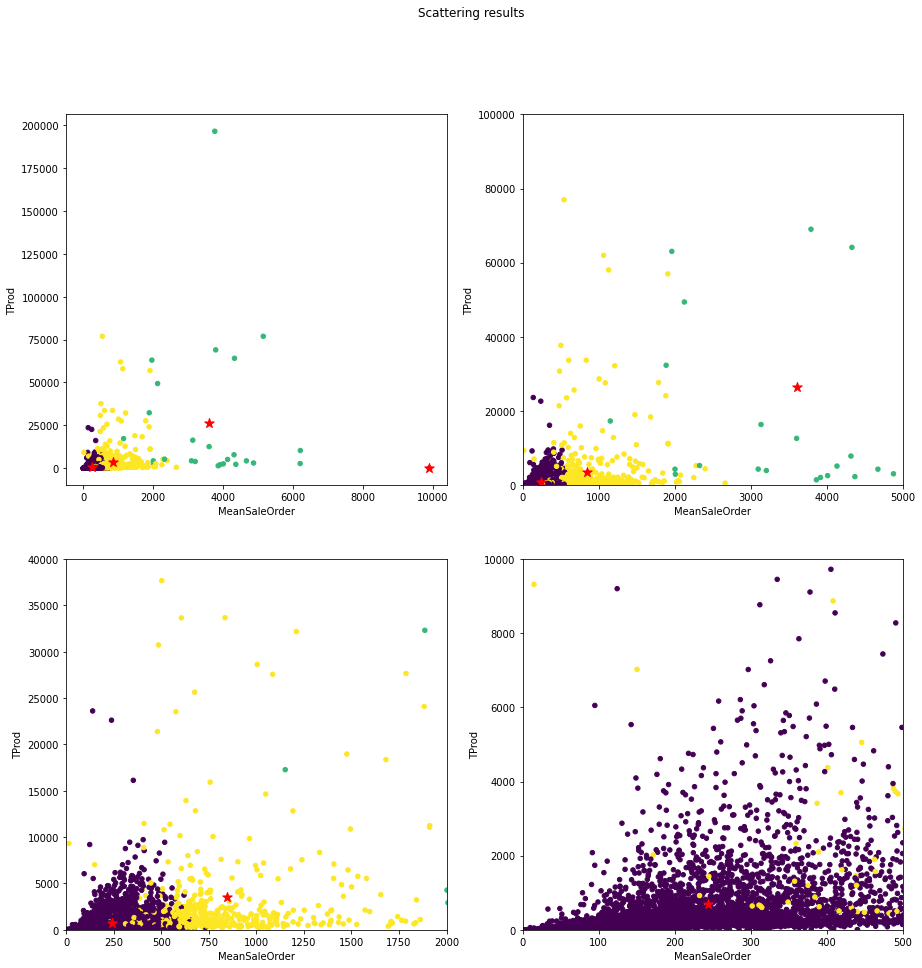

In [26]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

fig, axs = plt.subplots(2,2,figsize=(15,15))
fig.suptitle('Scattering results')

label_s = 10

col1, i1 = df2['MeanSaleOrder'], 2
col2, i2 = df2['TProd'], 0

axs[0][0].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[0][0].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[0][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][0].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[0][0].set_xlabel(df2.columns[i1], fontsize=label_s)

axs[0][1].set_xlim((0,5000))
axs[0][1].set_ylim((0,100000))
axs[0][1].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[0][1].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[0][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][1].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[0][1].set_xlabel(df2.columns[i1], fontsize=label_s)

axs[1][0].set_xlim((0,2000))
axs[1][0].set_ylim((0,40000))
axs[1][0].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[1][0].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[1][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][0].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[1][0].set_xlabel(df2.columns[i1], fontsize=label_s)

axs[1][1].set_xlim((0,500))
axs[1][1].set_ylim((0,10000))
axs[1][1].scatter(col1, col2, c=kmeans.labels_, s=20)
axs[1][1].scatter(centers[:, i1], centers[:, i2], s=100, marker='*', c='r')
axs[1][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][1].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[1][1].set_xlabel(df2.columns[i1], fontsize=label_s)

We can see how the anomalous cluster is well separated and completely on its own

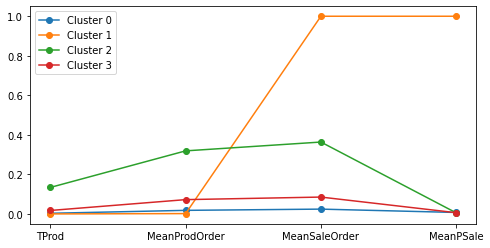

In [27]:
# normalized centers
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

We can further appreciate how the anomalous cluster has a completely different approach from the others (which follow more a parabolic like shape)

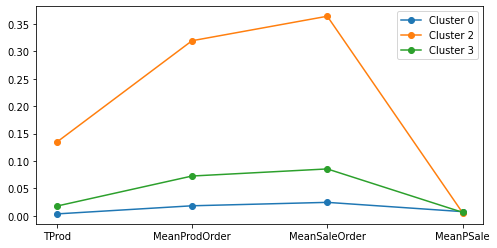

In [28]:
# normalized centers without anomalous cluster
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    if i != anomalous_cluster:
        plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

In [29]:
# create column containing cluster label
df['Cluster'] = kmeans.labels_

# create structure containing each single cluster
clust_list = list()
for i in tqdm(range(len(df['Cluster'].unique())), total=len(df['Cluster'].unique()), desc="Creating cluster dataframes"):
    clust_list.append(df[df['Cluster'] == i])

{0: 3857, 1: 1, 2: 25, 3: 450}


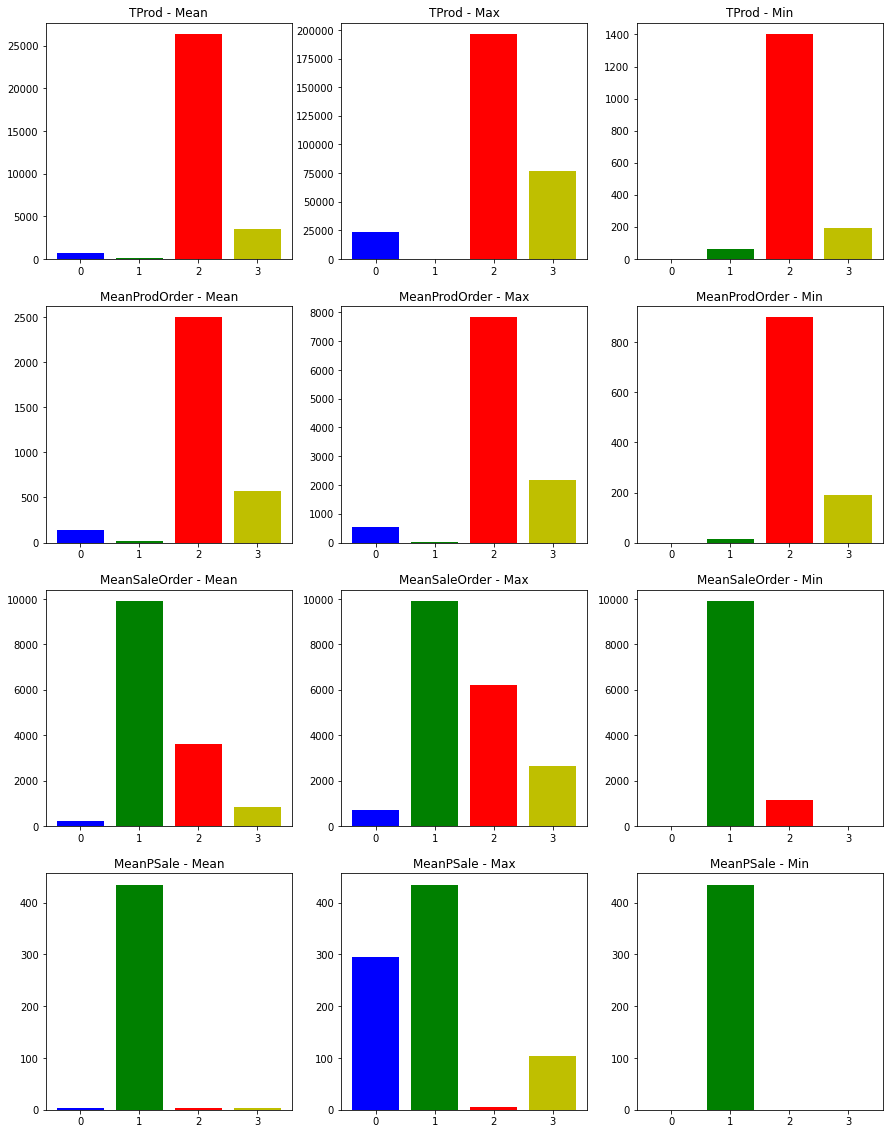

In [30]:
# plot attributes descriptions
attr = df2.columns
clusters = range(len(clust_list))
fig, axs = plt.subplots(len(attr),3,figsize=(15,20))
for attr_index in range(len(attr)):
    mean_values = []
    max_values = []
    min_values = []
    for cluster_df in clust_list:
        mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        max_values.append(cluster_df.describe()[attr[attr_index]][7])
        min_values.append(cluster_df.describe()[attr[attr_index]][3])
    axs[attr_index][0].bar(clusters, mean_values, color = ['b','g','r','y'])
    axs[attr_index][0].set_title(f"{attr[attr_index]} - Mean")
    axs[attr_index][1].bar(clusters, max_values, color = ['b','g','r','y'])
    axs[attr_index][1].set_title(f"{attr[attr_index]} - Max")
    axs[attr_index][2].bar(clusters, min_values, color = ['b','g','r','y'])
    axs[attr_index][2].set_title(f"{attr[attr_index]} - Min")

print(clust_dict)

Since the anomalous cluster is composed by only 1 value it has also anomalous mean values, ruining the analysis

# POST PROCESSING

In [31]:
# taking a peak at this weird cluster
clust_list[anomalous_cluster]

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
CustomerID,,,,,,,,,,,,,,,
15098,61,1,60,1,15.25,39619.5,297.0,38970.0,9904.875,60,434.65,3,2.0,2.0,1


In [32]:
# what happens if we try to merge the anomalous cluster with the one most similar to it? 

# saving index for most similar cluster
to_englobe = -1

for key in clust_dict.keys():
    if clust_dict[key] == 25:
        to_englobe = key
        
        
# visualize description of most similar cluster
clust_list[to_englobe].describe()['MeanPSale']

count    25.00000
mean      2.60540
std       1.50657
min       0.40000
25%       1.04800
50%       2.54400
75%       3.34900
max       5.73100
Name: MeanPSale, dtype: float64

In [33]:
# merging two clusters together
clust_list_merge = clust_list[to_englobe].copy()
clust_list_merge = clust_list_merge.append(clust_list[anomalous_cluster])

In [34]:
# visualize description of most similar cluster + anomalous customer
clust_list_merge.describe()['MeanPSale']

count     26.000000
mean      19.222500
std       84.743774
min        0.400000
25%        1.234000
50%        2.647000
75%        3.553000
max      434.650000
Name: MeanPSale, dtype: float64

**We can see how adding this single value alters greatly various descriptive values and this alters the cluster meaning in a non superficial way**

**Decision taken:** drop the anomalous cluster, we can see it as noise bringing no information to the analysis

In [35]:
clust_dict.pop(anomalous_cluster, None)
clust_list.pop(anomalous_cluster)

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder,Cluster
CustomerID,,,,,,,,,,,,,,,
15098,61,1,60,1,15.25,39619.5,297.0,38970.0,9904.875,60,434.65,3,2.0,2.0,1


{0: 3857, 2: 25, 3: 450}


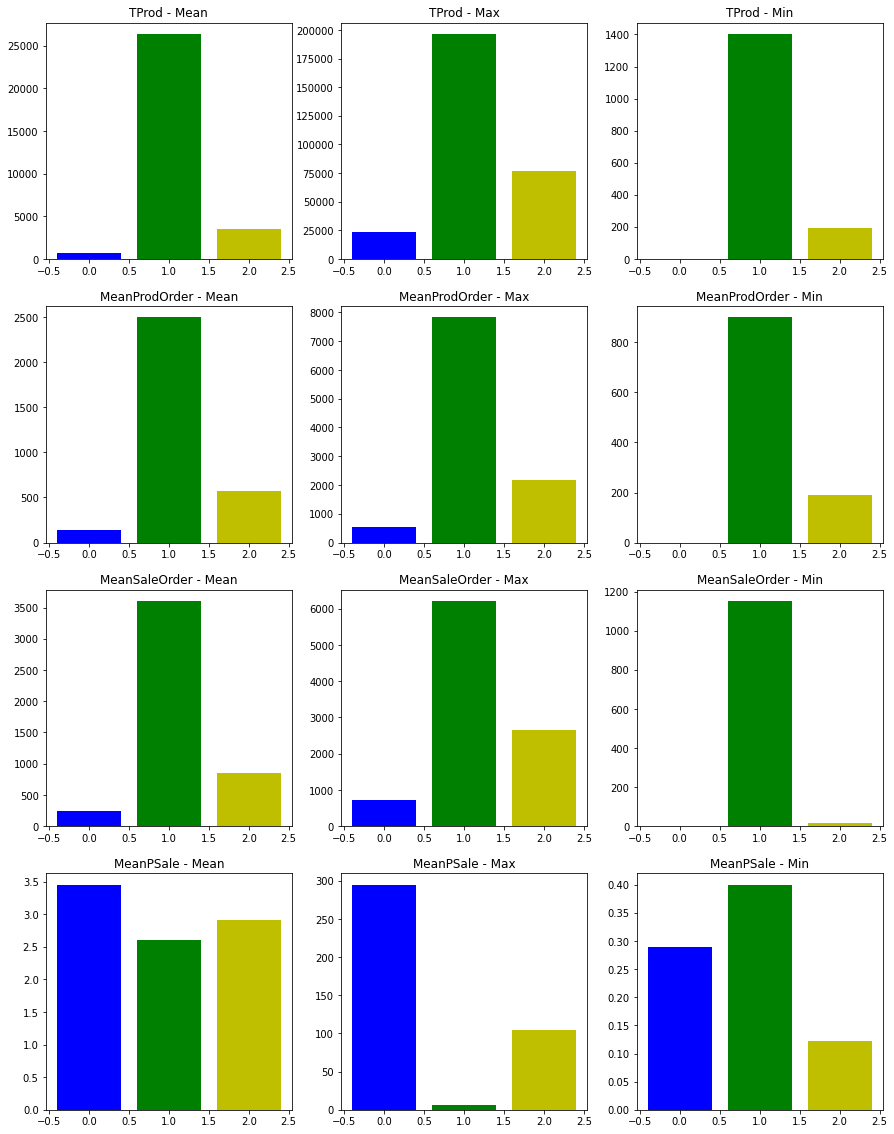

In [36]:
attr = df2.columns
clusters = range(len(clust_list))
fig, axs = plt.subplots(len(attr),3,figsize=(15,20))
for attr_index in range(len(attr)):
    mean_values = []
    max_values = []
    min_values = []
    stdev_values = []
    for cluster_df in clust_list:
        mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        max_values.append(cluster_df.describe()[attr[attr_index]][7])
        min_values.append(cluster_df.describe()[attr[attr_index]][3])
    axs[attr_index][0].bar(clusters, mean_values, color = ['b','g','y'])
    axs[attr_index][0].set_title(f"{attr[attr_index]} - Mean")
    axs[attr_index][1].bar(clusters, max_values, color = ['b','g','y'])
    axs[attr_index][1].set_title(f"{attr[attr_index]} - Max")
    axs[attr_index][2].bar(clusters, min_values, color = ['b','g','y'])
    axs[attr_index][2].set_title(f"{attr[attr_index]} - Min")
print(clust_dict)

# ANALYSIS

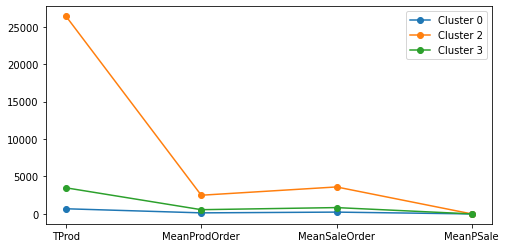

In [37]:
# non normalized centers
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    if i != anomalous_cluster:
        plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

In [38]:
for i in range(0, len(clust_list)):
    print('-'*50,'CLUSTER',i,'-'*50)
    print("\n",clust_list[i].describe()['MeanSaleOrder'])

-------------------------------------------------- CLUSTER 0 --------------------------------------------------

 count    3857.000000
mean      243.539506
std       125.801341
min         0.000000
25%       147.200000
50%       222.101000
75%       325.750000
max       731.520000
Name: MeanSaleOrder, dtype: float64
-------------------------------------------------- CLUSTER 1 --------------------------------------------------

 count      25.000000
mean     3603.479040
std      1326.661174
min      1152.000000
25%      2325.680000
50%      3789.815000
75%      4327.622000
max      6212.725000
Name: MeanSaleOrder, dtype: float64
-------------------------------------------------- CLUSTER 2 --------------------------------------------------

 count     450.000000
mean      847.539696
std       380.102599
min        14.938000
25%       615.823500
50%       738.780000
75%      1001.193750
max      2661.240000
Name: MeanSaleOrder, dtype: float64


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR9IawGaGT3e7eXNCxCk4UbFMXvygnOwOrnQg&usqp=CAU"/>

# Density-based clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import DBSCAN
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
# read customer dataframe
df = pd.read_csv('datasets/customer_dataframe.csv', sep='\t', index_col=0)

Perform some dimensionality reduction by picking only the main attributes
for describing a customer's shopping behaviour

In [3]:
df_reduct = df[['TProd', 'MeanProdOrder', 'MeanSaleOrder', 'MeanPSale']]
df_reduct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 17850 to 12713
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TProd          4333 non-null   int64  
 1   MeanProdOrder  4333 non-null   float64
 2   MeanSaleOrder  4333 non-null   float64
 3   MeanPSale      4333 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 169.3 KB


In [4]:
df_reduct.describe()

,TProd,MeanProdOrder,MeanSaleOrder,MeanPSale
count,4333.000000,4333.000000,4333.000000,4333.000000
mean,1129.535657,201.104614,327.882896,3.492819
std,4692.695935,274.590134,395.336014,8.997404
min,0.000000,0.000000,-0.000000,0.122000
25%,157.000000,80.500000,155.050000,2.160000
50%,370.000000,140.167000,241.900000,2.834000
75%,971.000000,237.750000,371.560000,3.712000
max,196556.000000,7824.000000,9904.875000,434.650000


<AxesSubplot:>

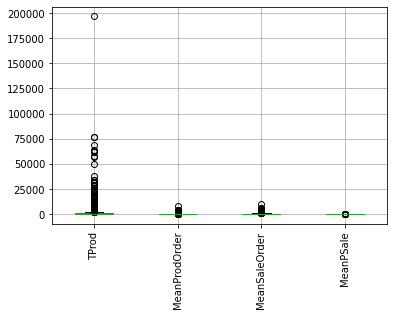

In [5]:
df_reduct.boxplot(list(df_reduct.columns), rot=90)

## Preprocessing - Normalization

In [6]:
# standard normalization: remove mean and scale to unit variance
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df_reduct.values)
df_norm = pd.DataFrame(df_norm, columns=df_reduct.columns)

In [7]:
df_norm.describe()

,TProd,MeanProdOrder,MeanSaleOrder,MeanPSale
count,4333.000000,4333.000000,4333.000000,4333.000000
mean,0.005747,0.025704,0.033103,0.007757
std,0.023875,0.035096,0.039913,0.020706
min,0.000000,0.000000,0.000000,0.000000
25%,0.000799,0.010289,0.015654,0.004690
50%,0.001882,0.017915,0.024422,0.006241
75%,0.004940,0.030387,0.037513,0.008262
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

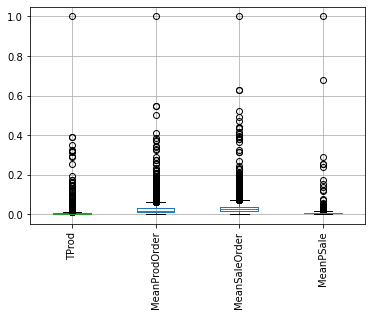

In [8]:
df_norm.boxplot(list(df_norm.columns), rot=90)

## DBSCAN

In [9]:
from scipy.spatial.distance import pdist, squareform
dist = pdist(X=df_norm, metric='euclidean')  #pair-wise distance: how every record is far from all others
dist = squareform(dist) #distance matrix given the vector dist

In [10]:
kmin = 3
kmax = 30
kth_distances = {}
for k in range(kmin, kmax + 1): kth_distances[k] = list()   # initialize k lists

# for every row of the distance matrix...
for d in dist:
    # argsort returns the indexes that would sort d
    indexes_to_sort_d = np.argsort(d)
    for k in range(kmin, kmax + 1):
        # append to kth_distances[k] the value in d that corresponds
        # to the distance of the i-th point (record) from its k-th nn.
        # it's like: kth_distances[k].append(sorted_d[k])), but we get "sorted_d[k]" by d[indexes_to_sort_d[k]]
        kth_distances[k].append(d[ indexes_to_sort_d[ k ] ])

Plot, for every value of k in [kmin, kmax], the sorted distances

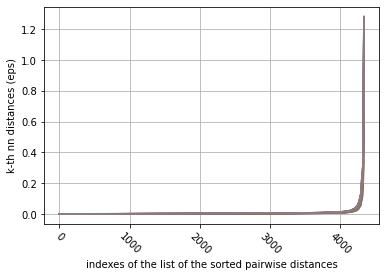

In [11]:
for k in kth_distances.keys():
    plt.plot(range(0, len(kth_distances[k])), sorted(kth_distances[k]))

plt.ylabel('k-th nn distances (eps)')
plt.xlabel('indexes of the list of the sorted pairwise distances')
plt.xticks(rotation=-45)
plt.tick_params(axis='both', which='major')
plt.grid()
plt.show()

Same plot with the median value of [kmin, kmax] for every x because the plot seems uniform for every k.<br>
Just to have a cleaner view of the plot

In [12]:
kmedian = list()
for i in tqdm(range(len(kth_distances[kmin])), total=len(kth_distances[kmin]), desc='Computing the median of the functions'):
    aux = list()
    for k in kth_distances.keys():
        aux.append(sorted(kth_distances[k])[i])
    kmedian.append(np.median(aux))

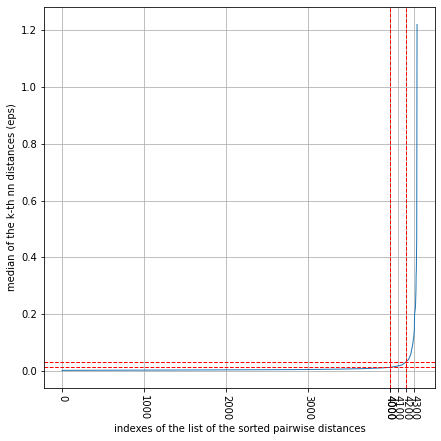

Elbow area of the median of kth-NN distances plot:
Low:	x = 4000 --> eps = 0.011832122874249798
High:	x = 4200 --> eps = 0.03131958136158988


In [13]:
figure(figsize=(7,7))
plt.plot(range(0,len(kth_distances[kmin])), kmedian, linewidth=1) #kmedian already sorted
plt.ylabel('median of the k-th nn distances (eps)')
plt.xlabel('indexes of the list of the sorted pairwise distances')

xticks = []
for i in range(0, 4001, 1000): xticks.append(i)
for i in range(4000, len(kth_distances[kmin]), 100): xticks.append(i)
plt.xticks(xticks, rotation=-90)
plt.tick_params(axis='both', which='major')
plt.grid()
low_elb = 4000
high_elb = 4200
plt.axvline(x=low_elb, color='red', linestyle='--', linewidth=1)
plt.axhline(y=sorted(kmedian)[low_elb], color='red', linestyle='--', linewidth=1)
plt.axvline(x=high_elb, color='red', linestyle='--', linewidth=1)
plt.axhline(y=sorted(kmedian)[high_elb], color='red', linestyle='--', linewidth=1)
plt.show()
print("Elbow area of the median of kth-NN distances plot:")
print(f"Low:\tx = {low_elb} --> eps = {kmedian[low_elb]}")  # kmedian is already sorted
print(f"High:\tx = {high_elb} --> eps = {kmedian[high_elb]}")  # kmedian is already sorted

### Grid search for _eps_ and <i>min_samples</i>

In [14]:
from sklearn.neighbors import NearestNeighbors

# func to get metrics to evaluate the clustering done with certain eps and min_samples
def get_metrics(eps, ms, dataset, iter_):

    # Fitting
    dbscan = DBSCAN(eps=eps, min_samples=ms)
    dbscan.fit(dataset)

    # Mean Noise Point Distance metric
    noise_indices = (dbscan.labels_ == -1)  #list of booleans
    if True in noise_indices:
        nbrs = NearestNeighbors(n_neighbors = 10).fit(dataset)
        distances, _ = nbrs.kneighbors(dataset)   #returns indices of and distances to the neighbors of each point
        noise_distances = distances[noise_indices, 1 : ]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None

    # Number of found Clusters metric
    number_of_clusters = len(np.unique(dbscan.labels_[dbscan.labels_ >= 0]))

    # Log
    # print("%3d | Tested with eps = %3s and min_samples = %3s | %5s\t%4s" % (iter_, eps, ms, str(noise_mean_distance), number_of_clusters))

    return noise_mean_distance, number_of_clusters

In [15]:
# Lists for the params to test in the grid search
gs_eps_list = [round(eps, 3) for eps in np.arange(kmedian[low_elb], kmedian[high_elb], 0.001)]
gs_ms_list = range(kmin, 10, 1) # after k=9 we always get 1 cluster

print("Grid search parameters:")
print("eps:", gs_eps_list)
print("min_samples:", list(gs_ms_list))

Grid search parameters:
eps: [0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031]
min_samples: [3, 4, 5, 6, 7, 8, 9]


Dataframes to contain the results of the grid search

In [16]:
# Dataframe for the metric on the avg distance of the noise points from the K nearest ones
results_noise = pd.DataFrame(
    data = np.zeros((len(gs_eps_list),len(gs_ms_list))), # Empty dataframe
    columns = gs_ms_list,
    index = gs_eps_list
)

# Dataframe for the metric on the number of clusters
results_clusters = pd.DataFrame(
    data = np.zeros((len(gs_eps_list),len(gs_ms_list))), # Empty dataframe
    columns = gs_ms_list,
    index = gs_eps_list
)

Grid search cycle:

In [17]:
#print("ITER| INFO%s |  DIST    # CLUSTERS" % (' '*39))
#print("-"*73)

# Grid search cycle
i = 0
for eps in tqdm(gs_eps_list, total=len(gs_eps_list), desc='Proceeding of grid search'):
    for ms in gs_ms_list:
        i += 1

        # Compute metrics
        noise_metric, clusters_metric = get_metrics(eps, ms, df_norm, i)

        # Insert results in the apposite dataframes
        results_noise.loc[eps, ms] = noise_metric
        results_clusters.loc[eps, ms] = clusters_metric

Results of grid search:

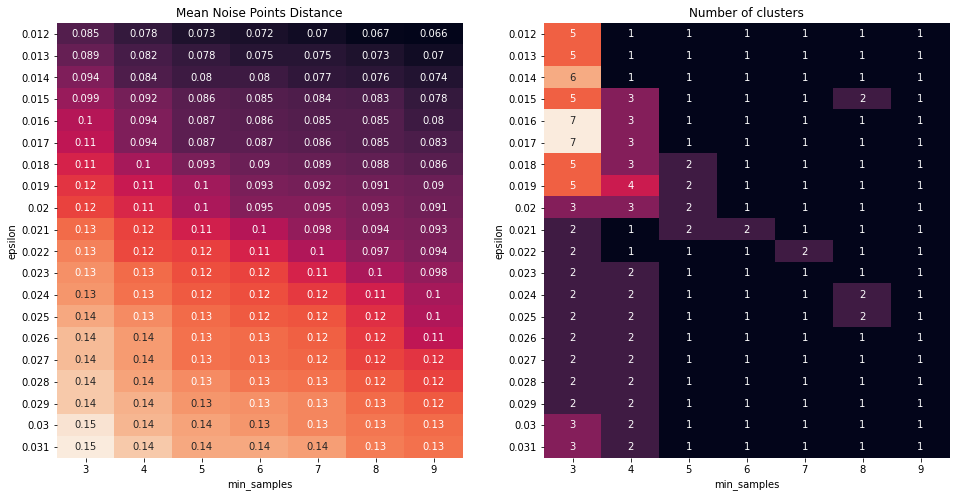

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("Number of clusters")
ax1.set_xlabel("min_samples")
ax2.set_xlabel("min_samples")
ax1.set_ylabel("epsilon")
ax2.set_ylabel("epsilon")
plt.show()

(array([-1,  0,  1,  2], dtype=int64), array([  97, 4223,    4,    9], dtype=int64))


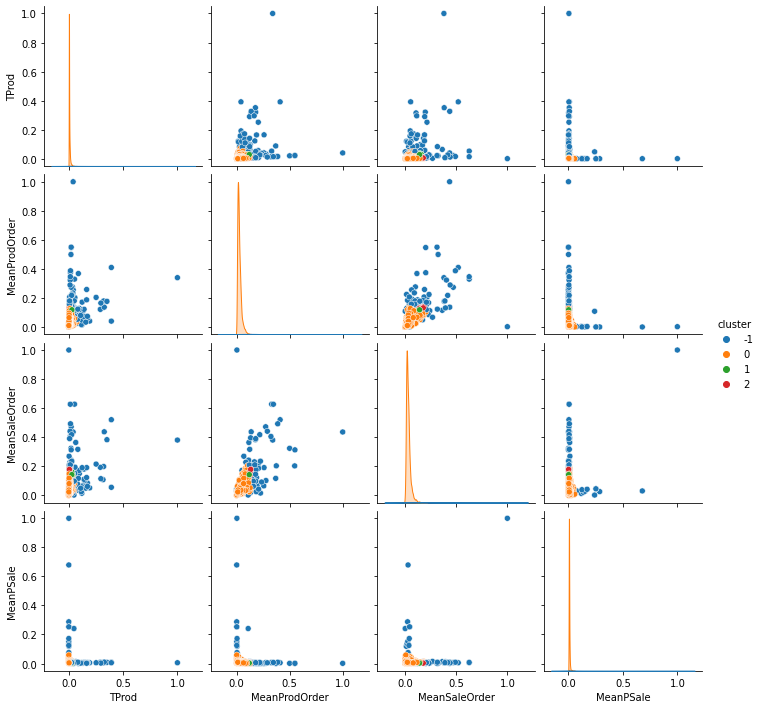

In [19]:
dbscan = DBSCAN(eps=0.02, min_samples=4).fit(df_norm)
print(np.unique(dbscan.labels_, return_counts=True))

# Extracting labels
df_norm['cluster'] = dbscan.labels_

# Pairplot
sns.pairplot(df_norm, hue='cluster', palette='tab10')
plt.show()

## Analyzing results

In [20]:
clust_list = list()
for i in tqdm(range(len(df_norm['cluster'].unique())-1), total=len(df_norm['cluster'].unique())-1, desc="Creating cluster dataframes"):
    clust_list.append(df_reduct.iloc[list(df_norm[df_norm['cluster'] == i].index)])

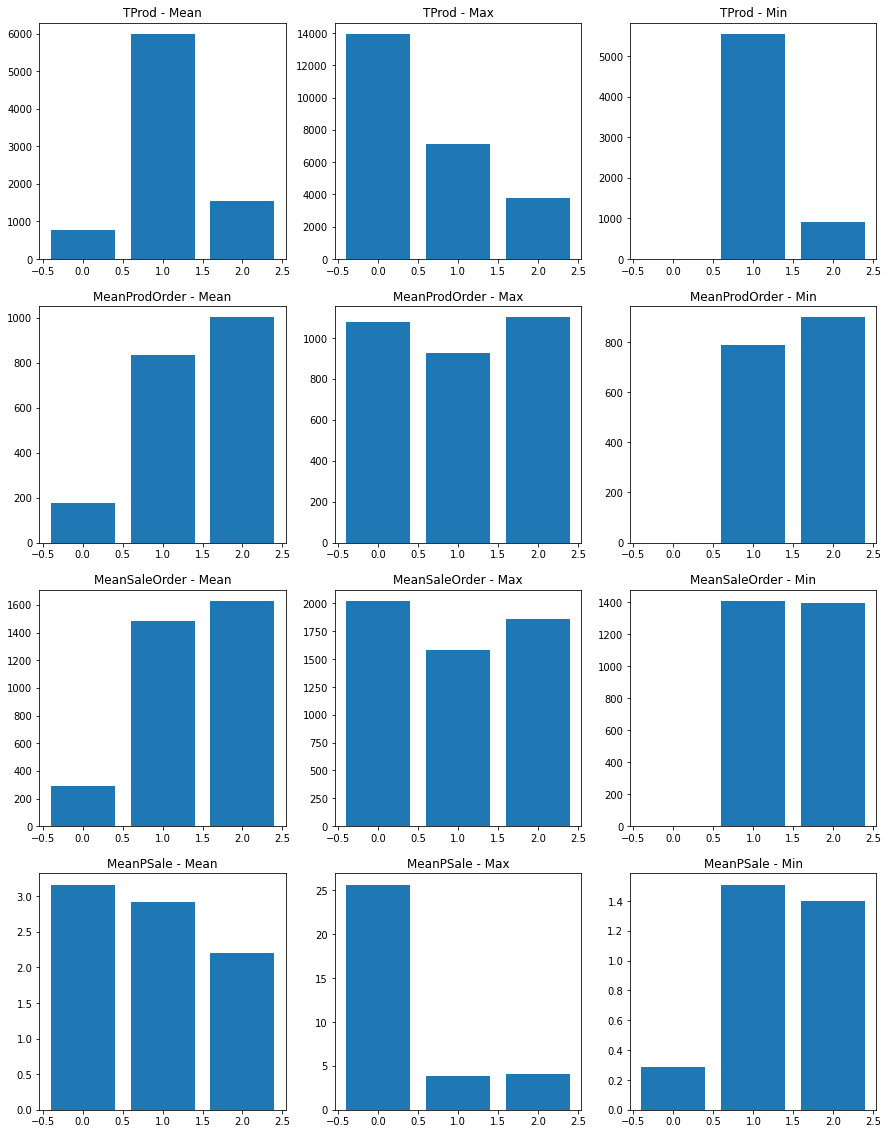

In [21]:
attr = list(df_reduct.columns)
clusters = range(len(clust_list))   # -1 to not consider the noise points
fig, axs = plt.subplots(len(attr), 3, figsize=(15,20))
for attr_index in range(len(attr)):
    avg_values = []
    max_values = []
    min_values = []
    for cluster_df in clust_list:
        stats = cluster_df.describe()
        avg_values.append(stats[attr[attr_index]][1])
        max_values.append(stats[attr[attr_index]][7])
        min_values.append(stats[attr[attr_index]][3])

    axs[attr_index][0].bar(clusters, avg_values)
    axs[attr_index][0].set_title(f"{attr[attr_index]} - Mean")
    axs[attr_index][1].bar(clusters, max_values)
    axs[attr_index][1].set_title(f"{attr[attr_index]} - Max")
    axs[attr_index][2].bar(clusters, min_values)
    axs[attr_index][2].set_title(f"{attr[attr_index]} - Min")

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR9IawGaGT3e7eXNCxCk4UbFMXvygnOwOrnQg&usqp=CAU"/>

# Hierarchical Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from tqdm import trange
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
df = pd.read_csv("datasets/customer_dataframe.csv", sep="\t", index_col=0)
df.head()

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder
CustomerID,,,,,,,,,,,,,,
17850,1702,21,141,12,48.629,5317.89,6.36,107.25,151.940,31,3.960,34,4.137,3.186
13047,1355,105,309,3,84.688,3089.10,6.64,68.00,193.069,35,3.926,9,5.421,3.875
12583,4978,114,714,100,292.824,6629.34,6.80,132.80,389.961,50,2.140,15,5.804,4.087
13748,439,24,208,8,87.800,948.25,9.36,204.00,189.650,0,3.996,5,4.080,2.322
15100,58,1,32,16,9.667,635.10,175.20,350.40,105.850,22,10.950,3,2.252,2.252


# Index selection for clustering

Only a small part of all the indexes in the dataset will be used during the process of clustering. The chosen attributes are the ones that better characterize che usual behaviour of a customer.

In [3]:
df_aux = df[['TProd', 'MeanProdOrder', 'MeanSaleOrder', 'MeanPSale']]
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 17850 to 12713
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TProd          4333 non-null   int64  
 1   MeanProdOrder  4333 non-null   float64
 2   MeanSaleOrder  4333 non-null   float64
 3   MeanPSale      4333 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 169.3 KB


In [4]:
df_aux.describe()

,TProd,MeanProdOrder,MeanSaleOrder,MeanPSale
count,4333.000000,4333.000000,4333.000000,4333.000000
mean,1129.535657,201.104614,327.882896,3.492819
std,4692.695935,274.590134,395.336014,8.997404
min,0.000000,0.000000,0.000000,0.122000
25%,157.000000,80.500000,155.050000,2.160000
50%,370.000000,140.167000,241.900000,2.834000
75%,971.000000,237.750000,371.560000,3.712000
max,196556.000000,7824.000000,9904.875000,434.650000


In [5]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_aux.values)

In [6]:
X[:2]

array([[0.00865911, 0.00621536, 0.01533992, 0.00883257],
       [0.00689371, 0.01082413, 0.01949232, 0.00875433]])

### Defining functions that will be useful for re-elaborate data and analyze results

In [7]:
# from the hierarchical clustering defined by the given linkage matrix and threshold return the cluster topology
def count_cluster_elements(data, threshold, criterion='distance'):
    count = {}
    clusters = fcluster(data, threshold, criterion)
    for c in clusters:
        count[c] = count[c]+1 if c in count else 1
    return count, clusters

In [8]:
# from flat clusters returns dictionary of dataframes representing the cluster
def get_dataframe(complete_df, flat_cluster):
    distinct_clusters = list(set(flat_cluster))
    sorted(distinct_clusters)
    cluster_index = {c:[] for c in distinct_clusters} 
    for i in range(len(flat_cluster)):
        cluster_index[flat_cluster[i]].append(i)
    clusters_df = {}
    indexes = df.index
    for c in distinct_clusters:
        elem = cluster_index[c]
        clusters_df[c] = df[df.index.isin([indexes[i] for i in elem])]
    return clusters_df

In [9]:
def plot_cluster_values(cdf, df_aux):
    attr = df_aux.columns
    clusters = [i for i in cdf]
    colors = ["red", "blue", "green", "yellow", "orange", "brown"]
    fig, axs = plt.subplots(len(attr),3,figsize=(15,15))
    for attr_index in range(len(attr)):
        mean_values = []
        max_values = []
        min_values = []
        for _, cluster_df in cdf.items():
            mean_values.append(cluster_df.describe()[attr[attr_index]][1])
            max_values.append(cluster_df.describe()[attr[attr_index]][7])
            min_values.append(cluster_df.describe()[attr[attr_index]][3])
        axs[attr_index][0].bar(clusters, mean_values, color=colors[:len(clusters)])
        axs[attr_index][0].set_title(f"{attr[attr_index]} - Mean")
        axs[attr_index][1].bar(clusters, max_values, color=colors[:len(clusters)])
        axs[attr_index][1].set_title(f"{attr[attr_index]} - Max")
        axs[attr_index][2].bar(clusters, min_values, color=colors[:len(clusters)])
        axs[attr_index][2].set_title(f"{attr[attr_index]} - Min")

# Complete - Euclidean

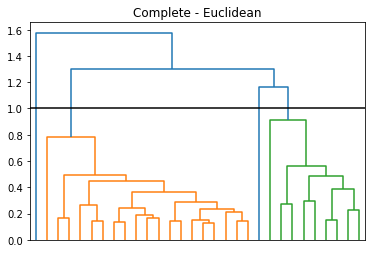

In [10]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
threshold_value = 1.0
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Complete - Euclidean")
plt.axhline(y=threshold_value, color="black")

In [11]:
conta, clusters = count_cluster_elements(data_link, threshold_value)
print("Clusters:", len(conta.keys()))
print(list(reversed(sorted(conta.values()))))

Clusters: 4
[4311, 20, 1, 1]


In [12]:
score = silhouette_score(X, clusters)
print(f"Silhouette score: {score}")

Silhouette score: 0.9229675968079302


In [13]:
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

[1:4311] [2:20] [3:1] [4:1] 

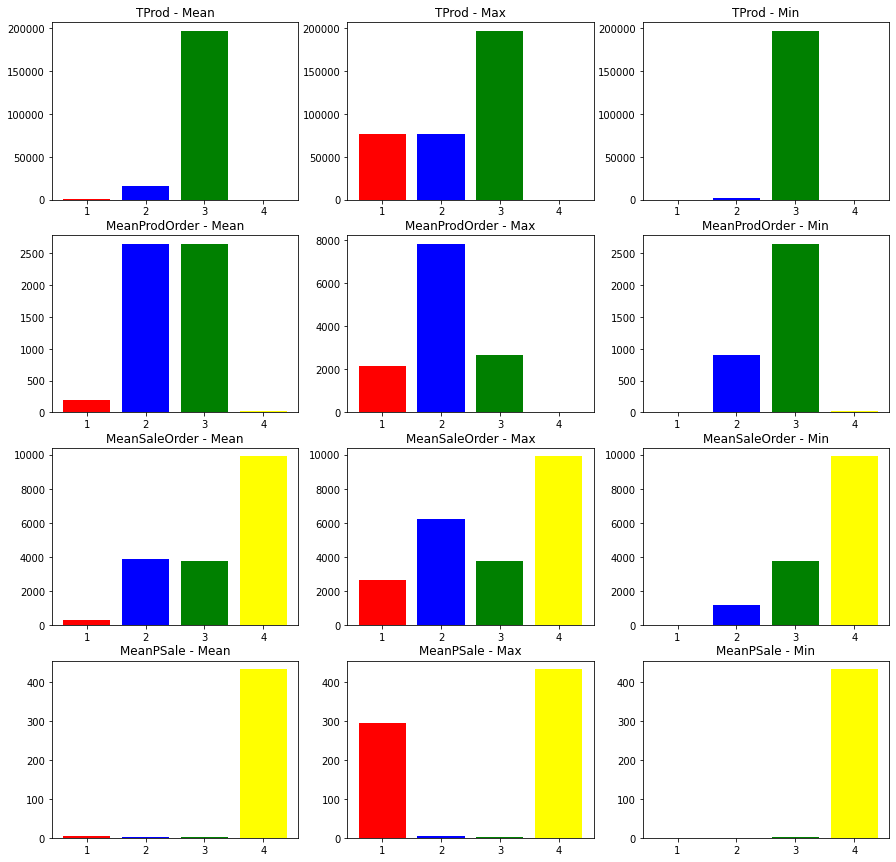

In [14]:
cdf = get_dataframe(df, clusters)
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

# Single - Euclidean

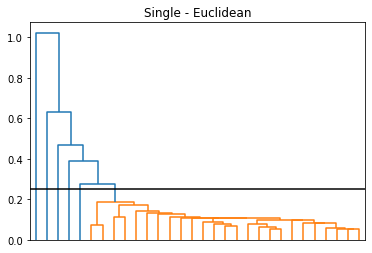

In [15]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
threshold_value = 0.25
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Single - Euclidean")
plt.axhline(y=threshold_value, color="black")

In [16]:
conta, clusters = count_cluster_elements(data_link, threshold_value)
print("Clusters:", len(conta.keys()))
print(list(reversed(sorted(conta.values()))))

Clusters: 6
[4328, 1, 1, 1, 1, 1]


In [17]:
score = silhouette_score(X, clusters)
print(f"Silhouette score: {score}")

Silhouette score: 0.9350227049491753


[1:4328] [2:1] [3:1] [4:1] [5:1] [6:1] 

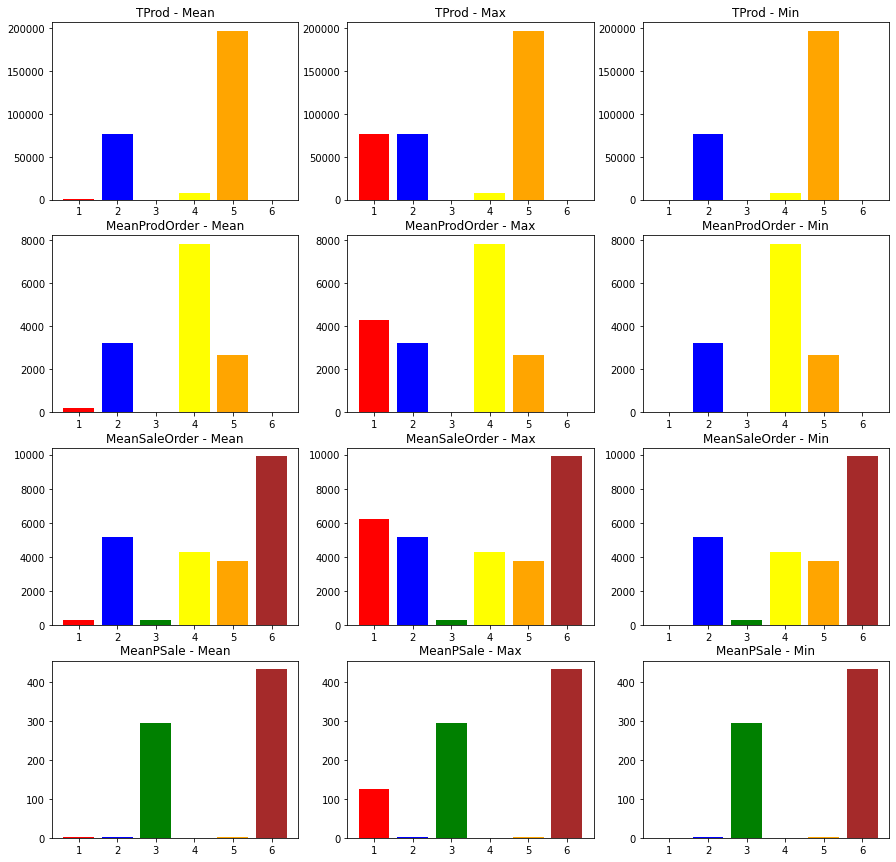

In [18]:
cdf = get_dataframe(df, clusters)
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

# Average - Euclidean

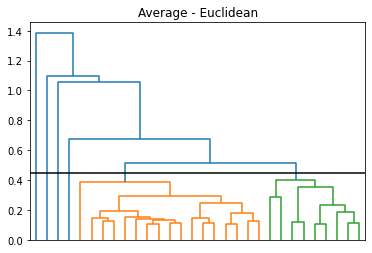

In [19]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
threshold_value = 0.45
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Average - Euclidean")
plt.axhline(y=threshold_value, color="black")

In [20]:
conta, clusters = count_cluster_elements(data_link, threshold_value)
print("Clusters:", len(conta.keys()))
print(list(reversed(sorted(conta.values()))))

Clusters: 6
[4312, 17, 1, 1, 1, 1]


In [21]:
score = silhouette_score(X, clusters)
print(f"Silhouette score: {score}")

Silhouette score: 0.9206974421486209


[1:4312] [2:17] [3:1] [4:1] [5:1] [6:1] 

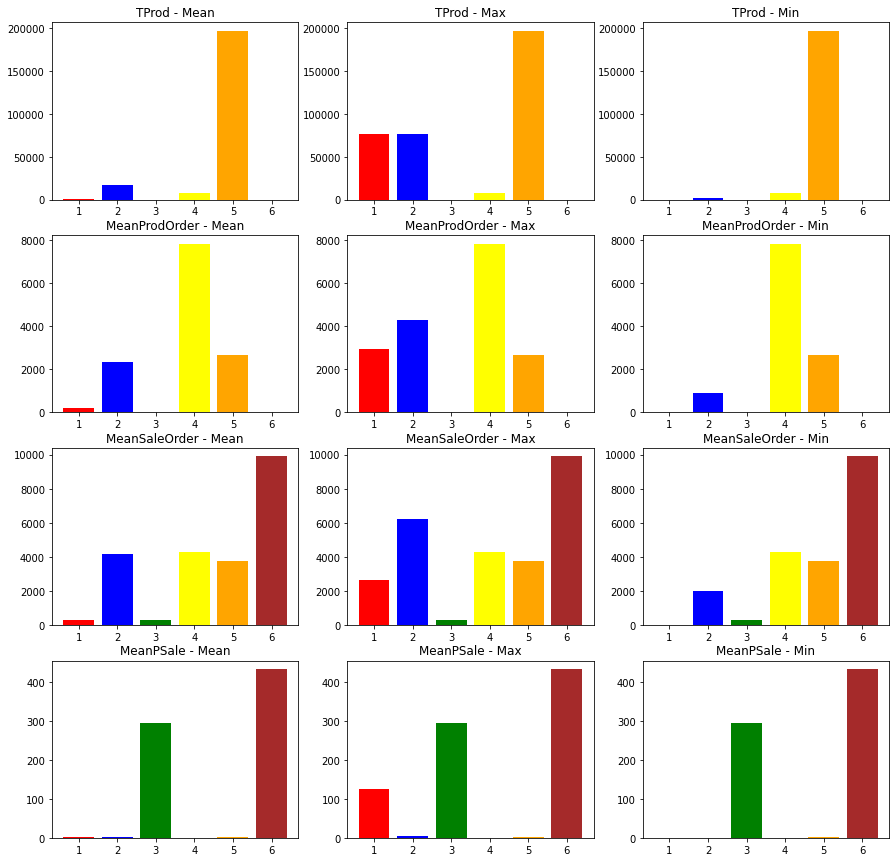

In [22]:
cdf = get_dataframe(df, clusters)
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

# Ward - Euclidean

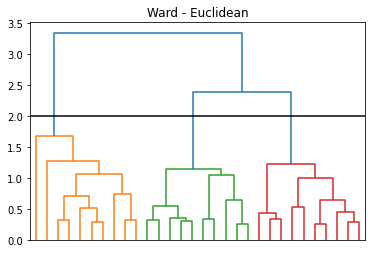

In [23]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
threshold_value = 2.0
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Ward - Euclidean")
plt.axhline(y=threshold_value, color="black")

In [24]:
conta, clusters = count_cluster_elements(data_link, threshold_value)
print("Clusters:", len(conta.keys()))
print(list(reversed(sorted(conta.values()))))

Clusters: 3
[3853, 458, 22]


In [25]:
score = silhouette_score(X, clusters)
print(f"Silhouette score: {score}")

Silhouette score: 0.6717133967267056


[1:22] [2:3853] [3:458] 

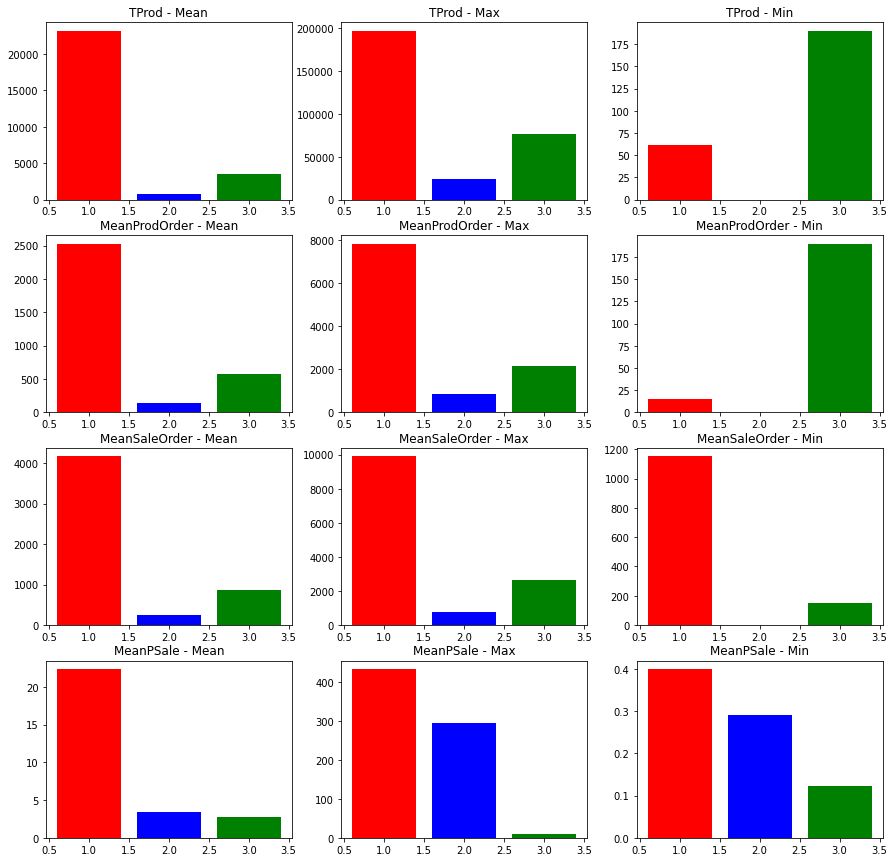

In [26]:
cdf = get_dataframe(df, clusters)
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

# Ward - Euclidean

(Considering the outlier sample alone)

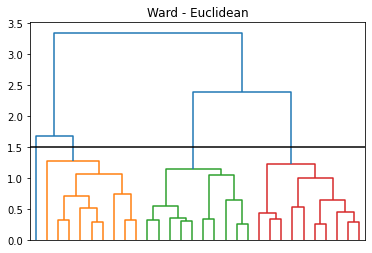

In [27]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
threshold_value = 1.5
res = dendrogram(data_link, color_threshold=threshold_value, truncate_mode='lastp')
plt.tick_params(labelbottom=False)
plt.title("Ward - Euclidean")
plt.axhline(y=threshold_value, color="black")

In [28]:
conta, clusters = count_cluster_elements(data_link, threshold_value)
print("Clusters:", len(conta.keys()))
print(list(reversed(sorted(conta.values()))))

Clusters: 4
[3853, 458, 21, 1]


In [29]:
score = silhouette_score(X, clusters)
print(f"Silhouette score: {score}")

Silhouette score: 0.6721013455064441


[1:21] [2:1] [3:3853] [4:458] 

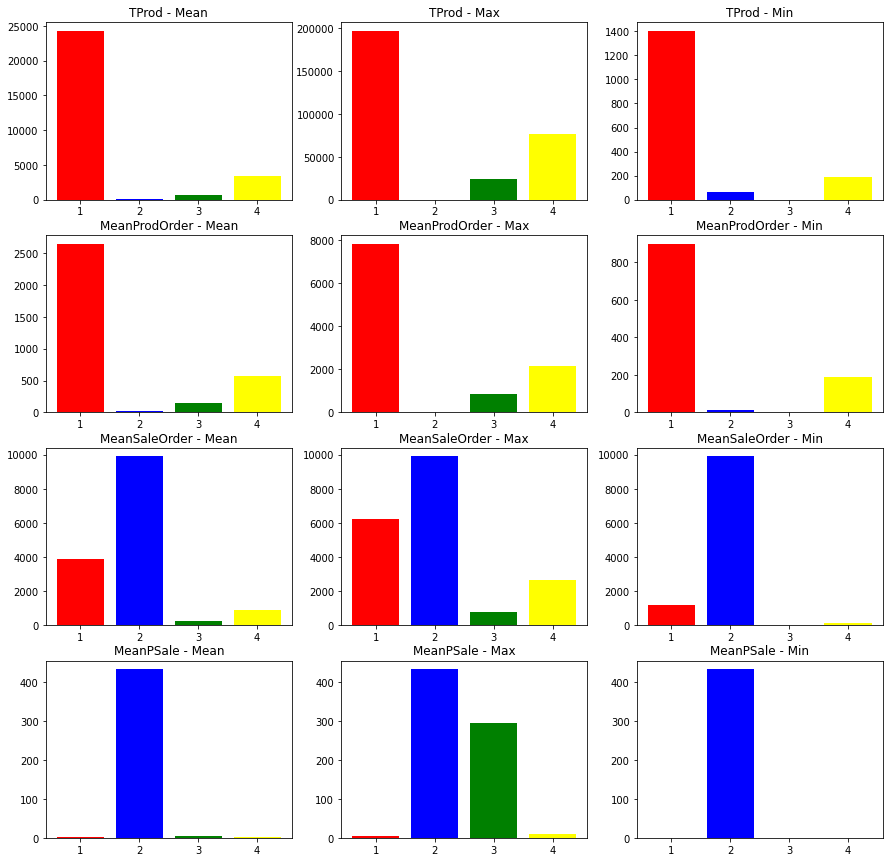

In [30]:
cdf = get_dataframe(df, clusters)
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

# Agglomerative Clustering

In [31]:
from sklearn.cluster import AgglomerativeClustering
connectivity=None

In [32]:
print("### Complete - Euclidean ###", end="\n\n")
for i in range(2, 5):
    complete = AgglomerativeClustering(n_clusters=i, linkage='complete', affinity='euclidean', connectivity=connectivity)
    complete.fit(X)
    hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
    
    print('Numero Cluster: ', i)
    print('Cluster', dict(zip(bins, hist)))
    print('Silhouette Score', silhouette_score(X, complete.labels_))
    print()

### Complete - Euclidean ###

Numero Cluster:  2
Cluster {0: 4332, 1: 1}
Silhouette Score 0.9687137721422231

Numero Cluster:  3
Cluster {0: 21, 1: 1, 2: 4311}
Silhouette Score 0.9265553774017546

Numero Cluster:  4
Cluster {0: 20, 1: 1, 2: 4311, 3: 1}
Silhouette Score 0.9229675968079302



In [33]:
print("### Single - Euclidean ###", end="\n\n")
for i in range(2, 5):
    complete = AgglomerativeClustering(n_clusters=i, linkage='single', affinity='euclidean', connectivity=connectivity)
    complete.fit(X)
    hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
    
    print('Numero Cluster: ', i)
    print('Cluster', dict(zip(bins, hist)))
    print('Silhouette Score', silhouette_score(X, complete.labels_))
    print()

### Single - Euclidean ###

Numero Cluster:  2
Cluster {0: 4332, 1: 1}
Silhouette Score 0.9687137721422231

Numero Cluster:  3
Cluster {0: 4331, 1: 1, 2: 1}
Silhouette Score 0.9604297674001191

Numero Cluster:  4
Cluster {0: 4330, 1: 1, 2: 1, 3: 1}
Silhouette Score 0.9579502745851489



In [34]:
print("### Average - Euclidean ###", end="\n\n")
for i in range(2, 5):
    complete = AgglomerativeClustering(n_clusters=i, linkage='average', affinity='euclidean', connectivity=connectivity)
    complete.fit(X)
    hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
    
    print('Numero Cluster: ', i)
    print('Cluster', dict(zip(bins, hist)))
    print('Silhouette Score', silhouette_score(X, complete.labels_))
    print()

### Average - Euclidean ###

Numero Cluster:  2
Cluster {0: 4332, 1: 1}
Silhouette Score 0.9687137721422231

Numero Cluster:  3
Cluster {0: 4331, 1: 1, 2: 1}
Silhouette Score 0.9604297674001191

Numero Cluster:  4
Cluster {0: 4330, 1: 1, 2: 1, 3: 1}
Silhouette Score 0.9579502745851489



In [35]:
print("### Ward - Euclidean ###", end="\n\n")
for i in range(2, 5):
    complete = AgglomerativeClustering(n_clusters=i, linkage='ward', affinity='euclidean', connectivity=connectivity)
    complete.fit(X)
    hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
    
    print('Numero Cluster: ', i)
    print('Cluster', dict(zip(bins, hist)))
    print('Silhouette Score', silhouette_score(X, complete.labels_))
    print('Davies-Bouldin Score', davies_bouldin_score(X, complete.labels_))
    print()

### Ward - Euclidean ###

Numero Cluster:  2
Cluster {0: 4311, 1: 22}
Silhouette Score 0.9308883038332841
Davies-Bouldin Score 0.6793311008821935

Numero Cluster:  3
Cluster {0: 22, 1: 458, 2: 3853}
Silhouette Score 0.6717133967267056
Davies-Bouldin Score 0.8419015649586915

Numero Cluster:  4
Cluster {0: 21, 1: 458, 2: 3853, 3: 1}
Silhouette Score 0.6721013455064441
Davies-Bouldin Score 0.6590717260952488



<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR9IawGaGT3e7eXNCxCk4UbFMXvygnOwOrnQg&usqp=CAU"/>

# Fuzzy C-Means

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.fcm import fcm

In [2]:
df = pd.read_csv("datasets/customer_dataframe.csv", sep="\t", index_col=0)
df.head()

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder
CustomerID,,,,,,,,,,,,,,
17850,1702,21,141,12,48.629,5317.89,6.36,107.25,151.940,31,3.960,34,4.137,3.186
13047,1355,105,309,3,84.688,3089.10,6.64,68.00,193.069,35,3.926,9,5.421,3.875
12583,4978,114,714,100,292.824,6629.34,6.80,132.80,389.961,50,2.140,15,5.804,4.087
13748,439,24,208,8,87.800,948.25,9.36,204.00,189.650,0,3.996,5,4.080,2.322
15100,58,1,32,16,9.667,635.10,175.20,350.40,105.850,22,10.950,3,2.252,2.252


In [3]:
df_aux = df[['TProd', 'MeanProdOrder', 'MeanSaleOrder', 'MeanPSale']]
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 17850 to 12713
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TProd          4333 non-null   int64  
 1   MeanProdOrder  4333 non-null   float64
 2   MeanSaleOrder  4333 non-null   float64
 3   MeanPSale      4333 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 169.3 KB


In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_aux.values)
X

array([[0.00865911, 0.00621536, 0.01533992, 0.00883257],
       [0.00689371, 0.01082413, 0.01949232, 0.00875433],
       [0.02532612, 0.03742638, 0.03937061, 0.00464412],
       ...,
       [0.00048841, 0.01226994, 0.03634574, 0.00834929],
       [0.00040192, 0.01009714, 0.02295738, 0.00874052],
       [0.00256924, 0.06454499, 0.08021807, 0.00451755]])

In [5]:
def get_dataframe(complete_df, flat_cluster):
    distinct_clusters = list(set(flat_cluster))
    sorted(distinct_clusters)
    cluster_index = {c:[] for c in distinct_clusters} 
    for i in range(len(flat_cluster)):
        cluster_index[flat_cluster[i]].append(i)
    clusters_df = {}
    indexes = df.index
    for c in distinct_clusters:
        elem = cluster_index[c]
        clusters_df[c] = df[df.index.isin([indexes[i] for i in elem])]
    return clusters_df

def plot_cluster_values(cdf, df_aux):
    attr = df_aux.columns
    clusters = [i for i in cdf]
    colors = ["red", "blue", "green", "yellow", "orange", "brown"]
    fig, axs = plt.subplots(len(attr),3,figsize=(15,15))
    for attr_index in range(len(attr)):
        mean_values = []
        max_values = []
        min_values = []
        for _, cluster_df in cdf.items():
            mean_values.append(cluster_df.describe()[attr[attr_index]][1])
            max_values.append(cluster_df.describe()[attr[attr_index]][7])
            min_values.append(cluster_df.describe()[attr[attr_index]][3])
        axs[attr_index][0].bar(clusters, mean_values, color=colors[:len(clusters)])
        axs[attr_index][0].set_title(f"{attr[attr_index]} - Mean")
        axs[attr_index][1].bar(clusters, max_values, color=colors[:len(clusters)])
        axs[attr_index][1].set_title(f"{attr[attr_index]} - Max")
        axs[attr_index][2].bar(clusters, min_values, color=colors[:len(clusters)])
        axs[attr_index][2].set_title(f"{attr[attr_index]} - Min")
        
def get_clusters(clusters, ignore=[]):
    cust_clust = {}
    for i in range(len(clusters)):
        for customer in clusters[i]:
            if customer not in ignore:
                cust_clust[customer] = i
    clustering = []
    for cust in sorted(cust_clust):
        clustering.append(cust_clust[cust])
    return clustering

In [7]:
# load list of points for cluster analysis
sample = X

In [8]:
# initialize
initial_centers = kmeans_plusplus_initializer(sample, 4, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
# create instance of Fuzzy C-Means algorithm
fcm_instance = fcm(sample, initial_centers)
# run cluster analysis and obtain results
fcm_instance.process()
clusters = fcm_instance.get_clusters()
centers = fcm_instance.get_centers()

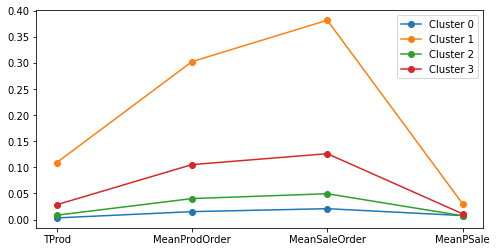

In [9]:
# normalized centers
label_s = 10
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df_aux.columns)), df_aux.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

Text(0.5, 0, 'MeanSaleOrder')

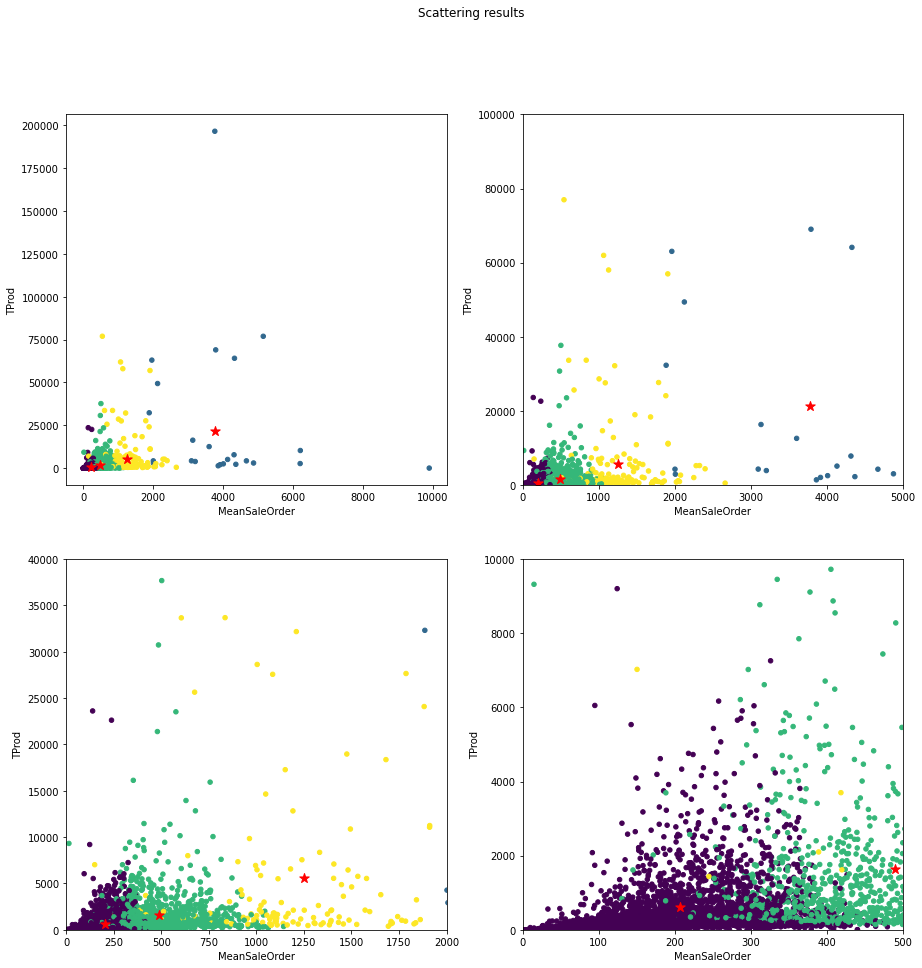

In [10]:
df2 = df_aux
cl = get_clusters(clusters)
center_norm = scaler.inverse_transform(centers)
fig, axs = plt.subplots(2,2,figsize=(15,15))
fig.suptitle('Scattering results')
label_s = 10
col1, i1 = df2['MeanSaleOrder'], 2
col2, i2 = df2['TProd'], 0
axs[0][0].scatter(col1, col2, c=cl, s=20)
axs[0][0].scatter([c[i1] for c in center_norm], [c[i2] for c in center_norm], s=100, marker='*', c='r')
axs[0][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][0].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[0][0].set_xlabel(df2.columns[i1], fontsize=label_s)

axs[0][1].set_xlim((0,5000))
axs[0][1].set_ylim((0,100000))
axs[0][1].scatter(col1, col2, c=cl, s=20)
axs[0][1].scatter([c[i1] for c in center_norm], [c[i2] for c in center_norm], s=100, marker='*', c='r')
axs[0][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][1].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[0][1].set_xlabel(df2.columns[i1], fontsize=label_s)

axs[1][0].set_xlim((0,2000))
axs[1][0].set_ylim((0,40000))
axs[1][0].scatter(col1, col2, c=cl, s=20)
axs[1][0].scatter([c[i1] for c in center_norm], [c[i2] for c in center_norm], s=100, marker='*', c='r')
axs[1][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][0].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[1][0].set_xlabel(df2.columns[i1], fontsize=label_s)

axs[1][1].set_xlim((0,500))
axs[1][1].set_ylim((0,10000))
axs[1][1].scatter(col1, col2, c=cl, s=20)
axs[1][1].scatter([c[i1] for c in center_norm], [c[i2] for c in center_norm], s=100, marker='*', c='r')
axs[1][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][1].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[1][1].set_xlabel(df2.columns[i1], fontsize=label_s)

In [11]:
l = get_clusters(clusters)
print("Silhouette score: ", silhouette_score(X, l))
print('Davies-Bouldin score: ', davies_bouldin_score(X, l))

Silhouette score:  0.49756186359212995
Davies-Bouldin score:  0.973474224933508


[0:3086] [1:24] [2:1086] [3:137] 

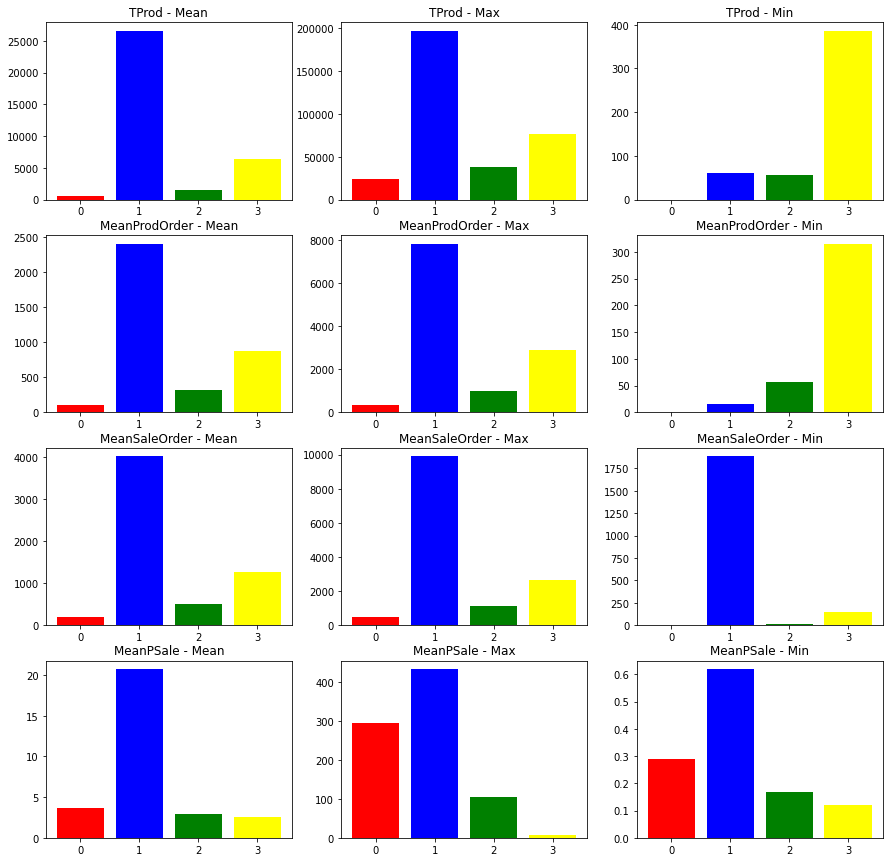

In [12]:
cdf = get_dataframe(df, get_clusters(clusters))
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

In [13]:
# ---------------------------

# ---------------------------

In [14]:
# initialize
initial_centers = kmeans_plusplus_initializer(sample, 3, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
# create instance of Fuzzy C-Means algorithm
fcm_instance = fcm(sample, initial_centers)
# run cluster analysis and obtain results
fcm_instance.process()
clusters = fcm_instance.get_clusters()
centers = fcm_instance.get_centers()

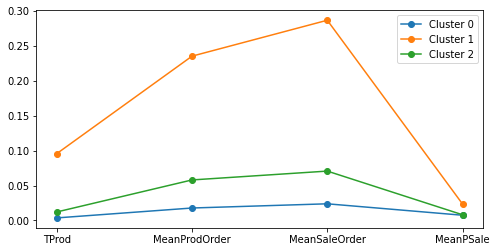

In [15]:
# normalized centers
label_s = 10
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=label_s)
plt.xticks(range(0, len(df_aux.columns)), df_aux.columns, fontsize=label_s)
plt.legend(fontsize=label_s)
plt.show()

Text(0.5, 0, 'MeanSaleOrder')

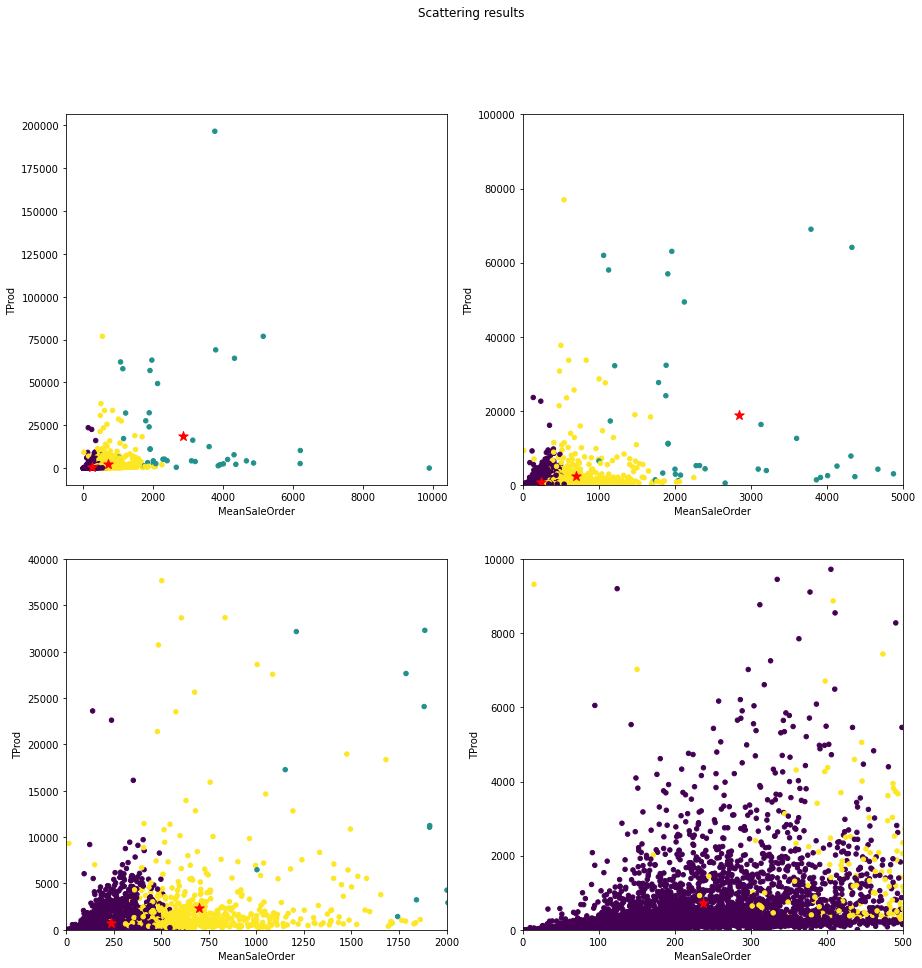

In [16]:
df2 = df_aux
cl = get_clusters(clusters)
center_norm = scaler.inverse_transform(centers)
fig, axs = plt.subplots(2,2,figsize=(15,15))
fig.suptitle('Scattering results')
label_s = 10
col1, i1 = df2['MeanSaleOrder'], 2
col2, i2 = df2['TProd'], 0
axs[0][0].scatter(col1, col2, c=cl, s=20)
axs[0][0].scatter([c[i1] for c in center_norm], [c[i2] for c in center_norm], s=100, marker='*', c='r')
axs[0][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][0].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[0][0].set_xlabel(df2.columns[i1], fontsize=label_s)

axs[0][1].set_xlim((0,5000))
axs[0][1].set_ylim((0,100000))
axs[0][1].scatter(col1, col2, c=cl, s=20)
axs[0][1].scatter([c[i1] for c in center_norm], [c[i2] for c in center_norm], s=100, marker='*', c='r')
axs[0][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[0][1].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[0][1].set_xlabel(df2.columns[i1], fontsize=label_s)

axs[1][0].set_xlim((0,2000))
axs[1][0].set_ylim((0,40000))
axs[1][0].scatter(col1, col2, c=cl, s=20)
axs[1][0].scatter([c[i1] for c in center_norm], [c[i2] for c in center_norm], s=100, marker='*', c='r')
axs[1][0].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][0].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[1][0].set_xlabel(df2.columns[i1], fontsize=label_s)

axs[1][1].set_xlim((0,500))
axs[1][1].set_ylim((0,10000))
axs[1][1].scatter(col1, col2, c=cl, s=20)
axs[1][1].scatter([c[i1] for c in center_norm], [c[i2] for c in center_norm], s=100, marker='*', c='r')
axs[1][1].tick_params(axis='both', which='major', labelsize=label_s)
axs[1][1].set_ylabel(df2.columns[i2], fontsize=label_s)
axs[1][1].set_xlabel(df2.columns[i1], fontsize=label_s)

In [17]:
skip = list(df.index).index(15098)
X = np.delete(X, [skip], axis=0)
l = get_clusters(clusters, ignore=[skip])
print("Silhouette score: ", silhouette_score(X, l))
print('Davies-Bouldin score: ', davies_bouldin_score(X, l))

Silhouette score:  0.6206755907312664
Davies-Bouldin score:  0.8650914791834757


[0:3681] [1:41] [2:610] 

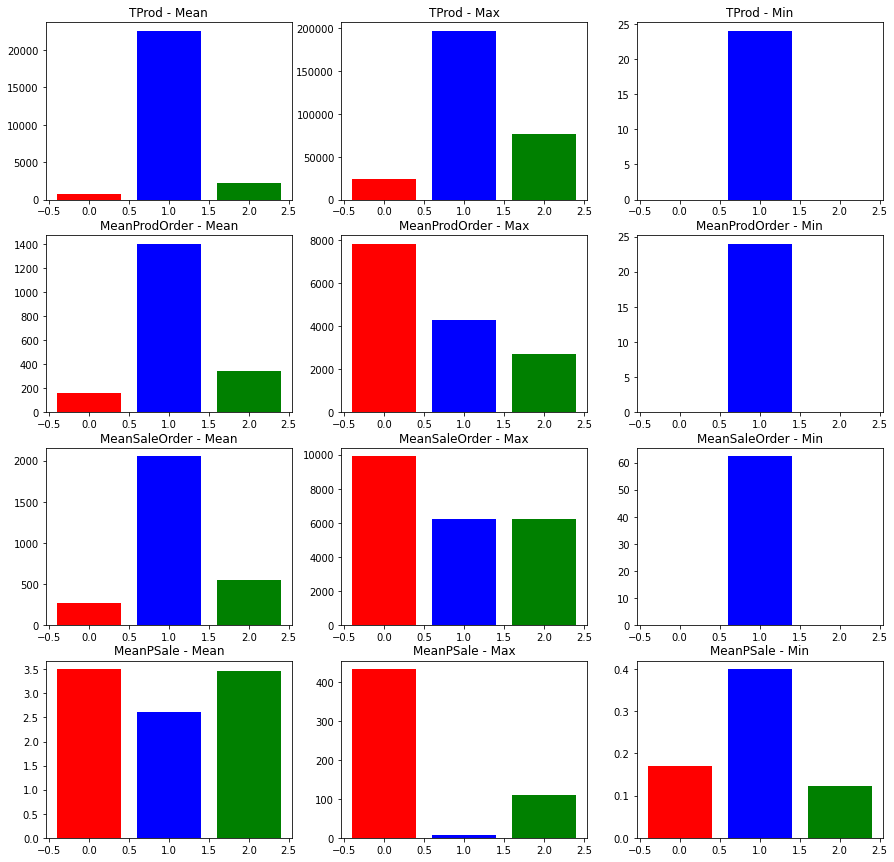

In [18]:
cdf = get_dataframe(df, get_clusters(clusters, ignore=[skip]))
for cluster, cluster_df in cdf.items():
    print(f"[{cluster}:{len(cluster_df)}]", end=" ")
plot_cluster_values(cdf, df_aux)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR9IawGaGT3e7eXNCxCk4UbFMXvygnOwOrnQg&usqp=CAU"/>

# Genetic Algorithms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from tqdm import trange
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from pyclustering.cluster.ga import genetic_algorithm, ga_observer, ga_visualizer
from pyclustering.cluster import cluster_visualizer, cluster_visualizer_multidim

In [2]:
df = pd.read_csv("datasets/customer_dataframe.csv", sep="\t", index_col=0)
df_aux = df[['MeanProdOrder', 'MeanSaleOrder', 'MeanPSale']]
scaler = MinMaxScaler()
X = scaler.fit_transform(df_aux.values)

In [3]:
def ga_cluster(sample, nc, cc, pc, mg):
    observer_instance = ga_observer(True, True, True)
    ga_instance = genetic_algorithm(data=sample, count_clusters=nc, chromosome_count=cc, population_count=pc,count_mutation_gens=mg,observer=observer_instance)
    ga_instance.process()
    clusters = ga_instance.get_clusters()
    print([len(c) for c in clusters])    
    clusters_df = {}
    indexes = df.index
    for i in range(len(clusters)):
        clusters_df[i] = df[df.index.isin([indexes[i] for i in clusters[i]])]
    attr = df_aux.columns
    mean_values_to_plot= {a:[] for a in attr}
    to_plot = [[x[1],x[2]] for x in sample]
    for attr_index in range(len(attr)):
        mean_values = []
        for _, cluster_df in clusters_df.items():
            mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        mean_values_to_plot[attr[attr_index]] = mean_values
    ga_visualizer.show_clusters(to_plot, observer_instance)
    
    return mean_values_to_plot, clusters

def calc_silhouette(data, clusters):
    cust_clust = {}
    for i in range(len(clusters)):
        for customer in clusters[i]:
            cust_clust[customer] = i
    clustering = []
    for cust in sorted(cust_clust):
        clustering.append(cust_clust[cust])
    print("Silhouette score: ", silhouette_score(data, clustering))
    return clustering

def plot_stats(means, cl):
    attr = df_aux.columns
    clusters = [i for i in range(len(cl))]
    colors = ["red", "blue", "green", "yellow", "orange", "brown", "purple", "pink"]
    fig, axs = plt.subplots(len(attr),figsize=(15,15))
    for attr_index in range(len(attr)):
        axs[attr_index].bar(clusters, means[attr[attr_index]], color=colors[:len(clusters)])
        axs[attr_index].set_title(f"{attr[attr_index]} - Mean")

def plot_dist(df_aux, clustering):
    fig, axs = plt.subplots(2,2,figsize=(15,15))
    fig.suptitle('Scattering results')
    label_s = 10
    col1, i1 = df_aux['MeanProdOrder'], 0
    col2, i2 = df_aux['MeanPSale'], 2

    axs[0][0].scatter(col1, col2, c=clustering, s=20)
    axs[0][0].tick_params(axis='both', which='major', labelsize=label_s)
    axs[0][0].set_ylabel(df_aux.columns[i2], fontsize=label_s)
    axs[0][0].set_xlabel(df_aux.columns[i1], fontsize=label_s)

    axs[0][1].set_xlim((0,4000))
    axs[0][1].set_ylim((0,100))
    axs[0][1].scatter(col1, col2, c=clustering, s=20)
    axs[0][1].tick_params(axis='both', which='major', labelsize=label_s)
    axs[0][1].set_ylabel(df_aux.columns[i2], fontsize=label_s)
    axs[0][1].set_xlabel(df_aux.columns[i1], fontsize=label_s)

    axs[1][0].set_xlim((0,2000))
    axs[1][0].set_ylim((0,50))
    axs[1][0].scatter(col1, col2, c=clustering, s=20)
    axs[1][0].tick_params(axis='both', which='major', labelsize=label_s)
    axs[1][0].set_ylabel(df_aux.columns[i2], fontsize=label_s)
    axs[1][0].set_xlabel(df_aux.columns[i1], fontsize=label_s)

    axs[1][1].set_xlim((0,1000))
    axs[1][1].set_ylim((0,20))
    axs[1][1].scatter(col1, col2, c=clustering, s=20)
    axs[1][1].tick_params(axis='both', which='major', labelsize=label_s)
    axs[1][1].set_ylabel(df_aux.columns[i2], fontsize=label_s)
    axs[1][1].set_xlabel(df_aux.columns[i1], fontsize=label_s)

[1435, 1509, 1389]


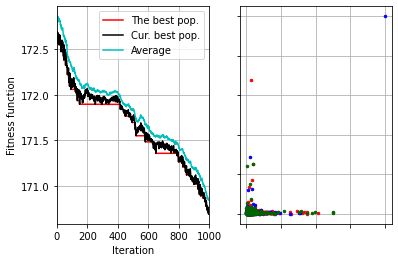

Silhouette score:  -0.055325831765057


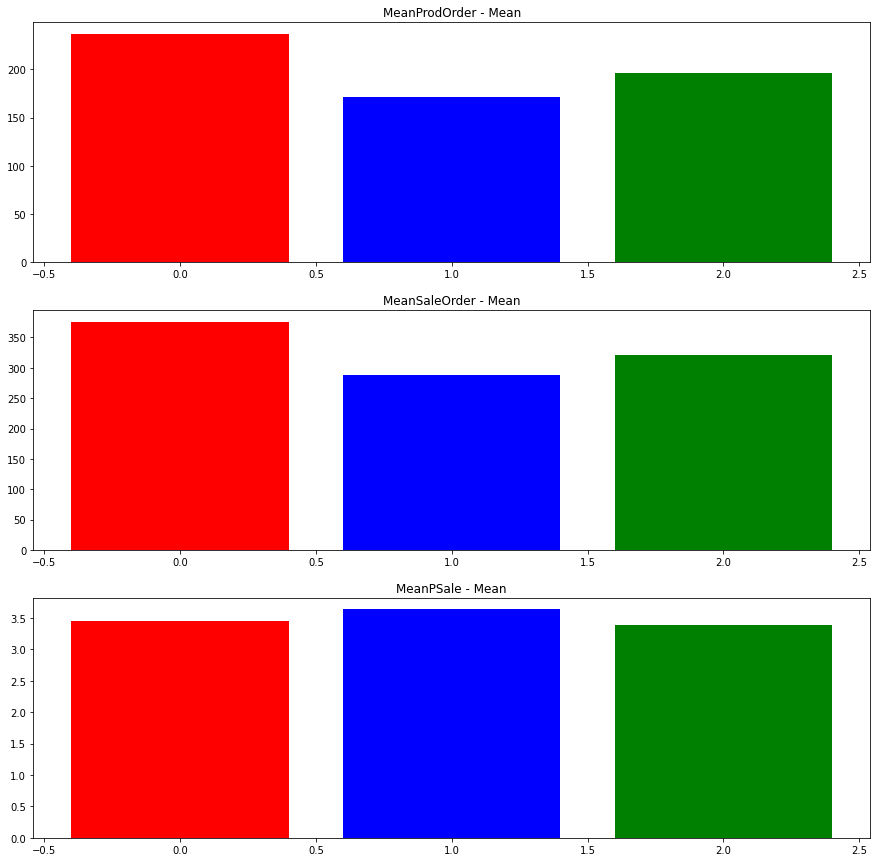

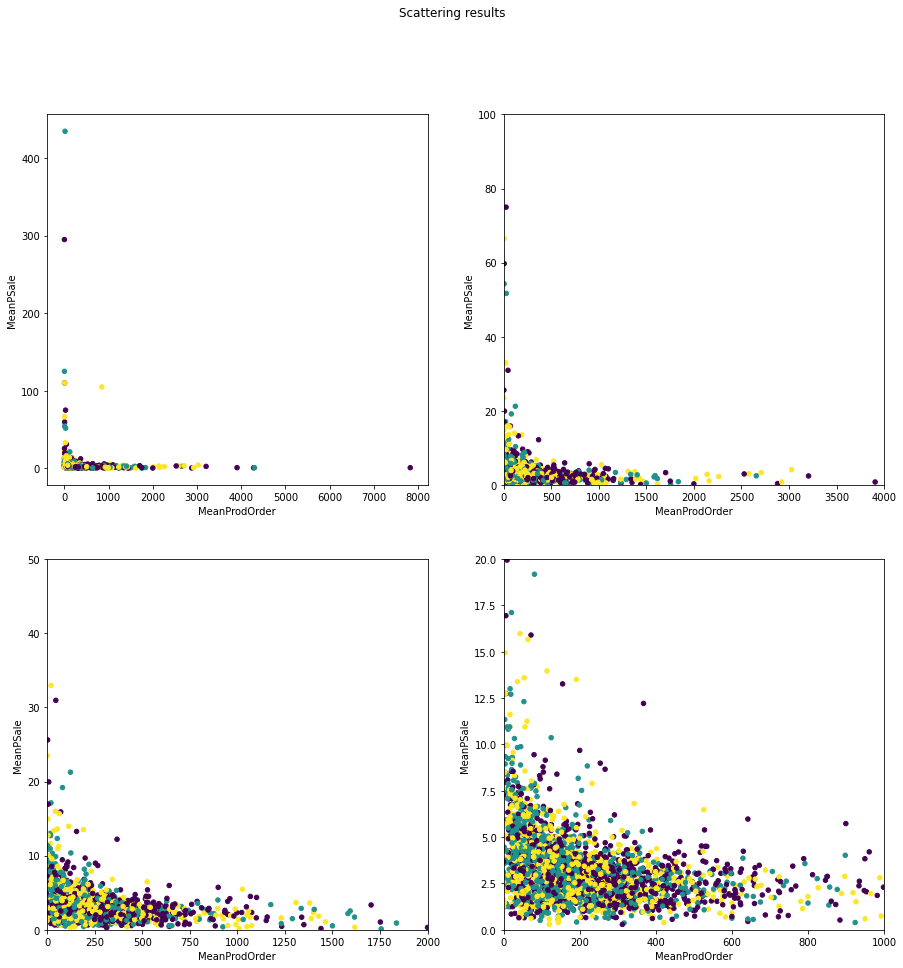

In [4]:
nc = 3
pc = 1000
cc = 50
mg = 5
mv, cl = ga_cluster(X, nc, cc, pc, mg)
clust_ord = calc_silhouette(X, cl)
plot_stats(mv, cl)
plot_dist(df_aux, clust_ord)

[1082, 1085, 1037, 1129]


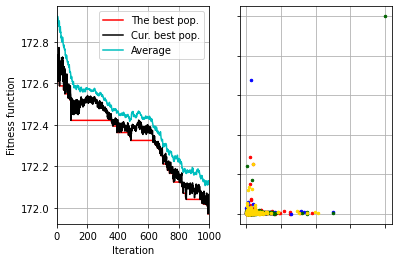

Silhouette score:  -0.0720239887685114


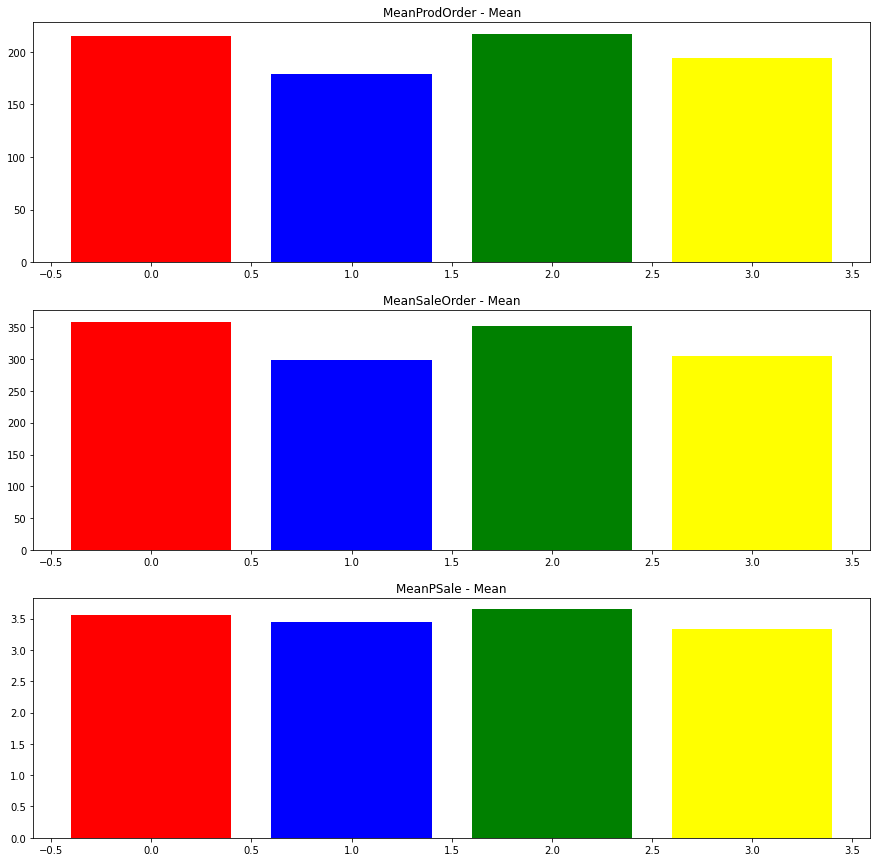

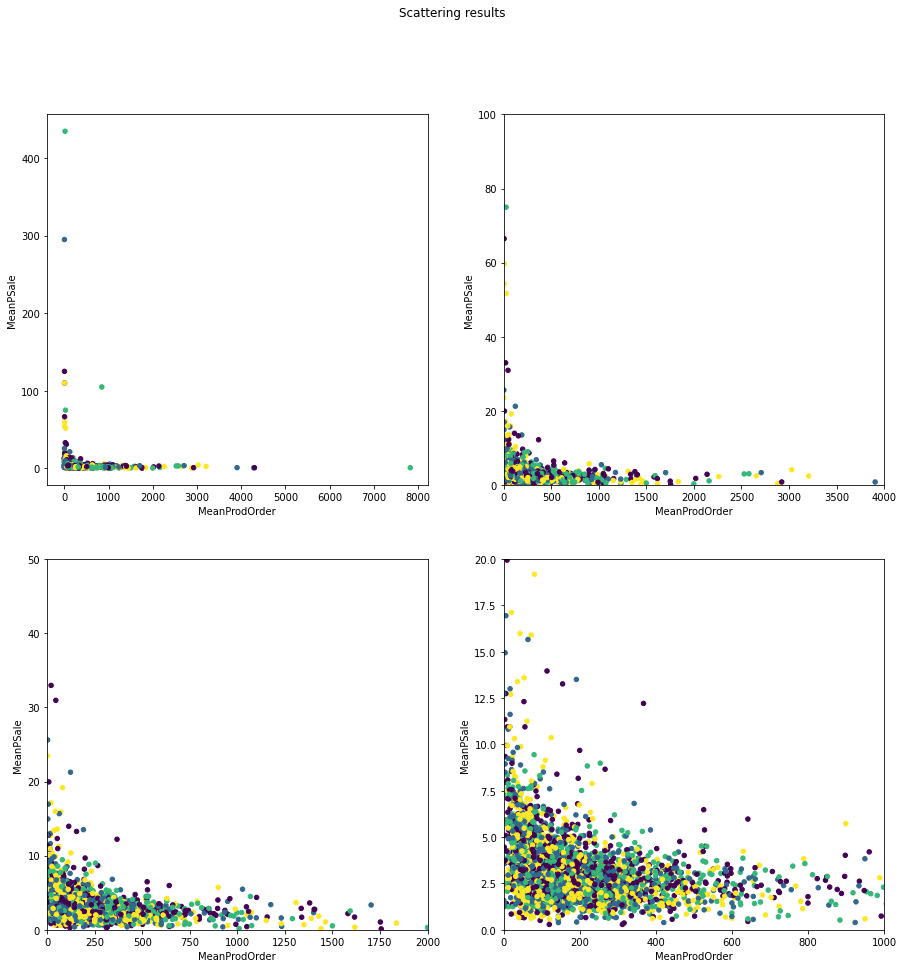

In [5]:
nc = 4
pc = 1000
cc = 50
mg = 5
mv, cl = ga_cluster(X, nc, cc, pc, mg)
clust_ord = calc_silhouette(X, cl)
plot_stats(mv, cl)
plot_dist(df_aux, clust_ord)

[827, 891, 844, 891, 880]


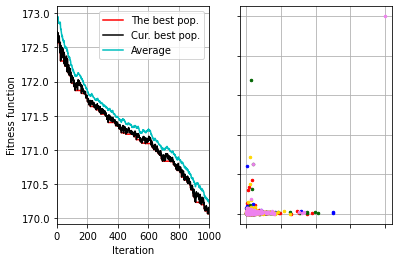

Silhouette score:  -0.11333655622423061


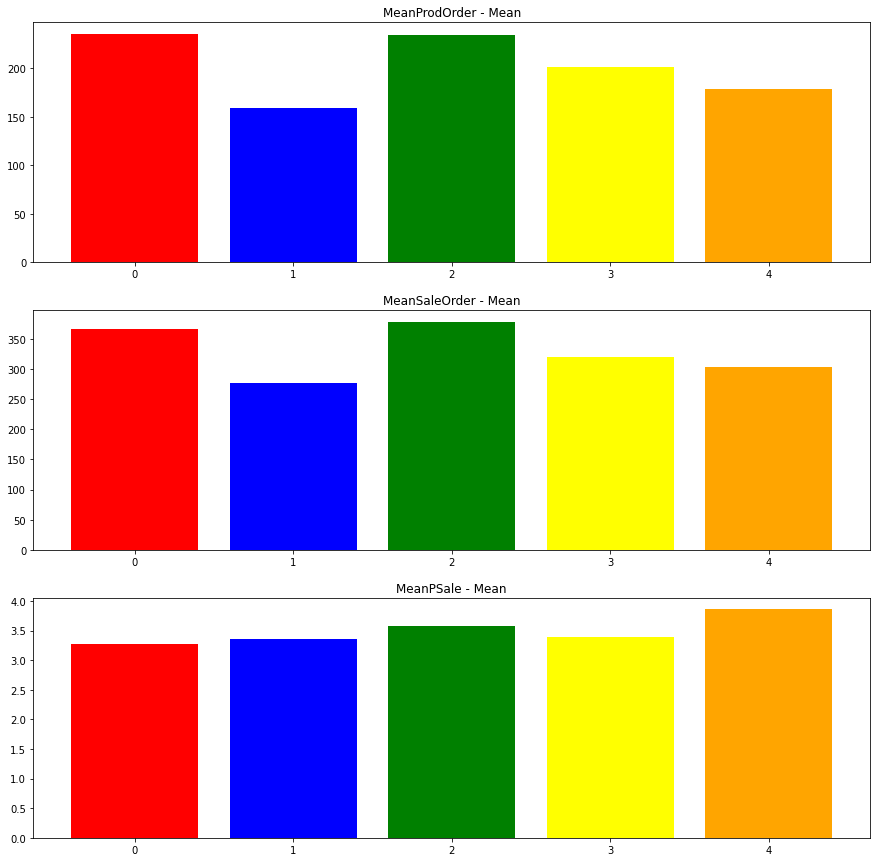

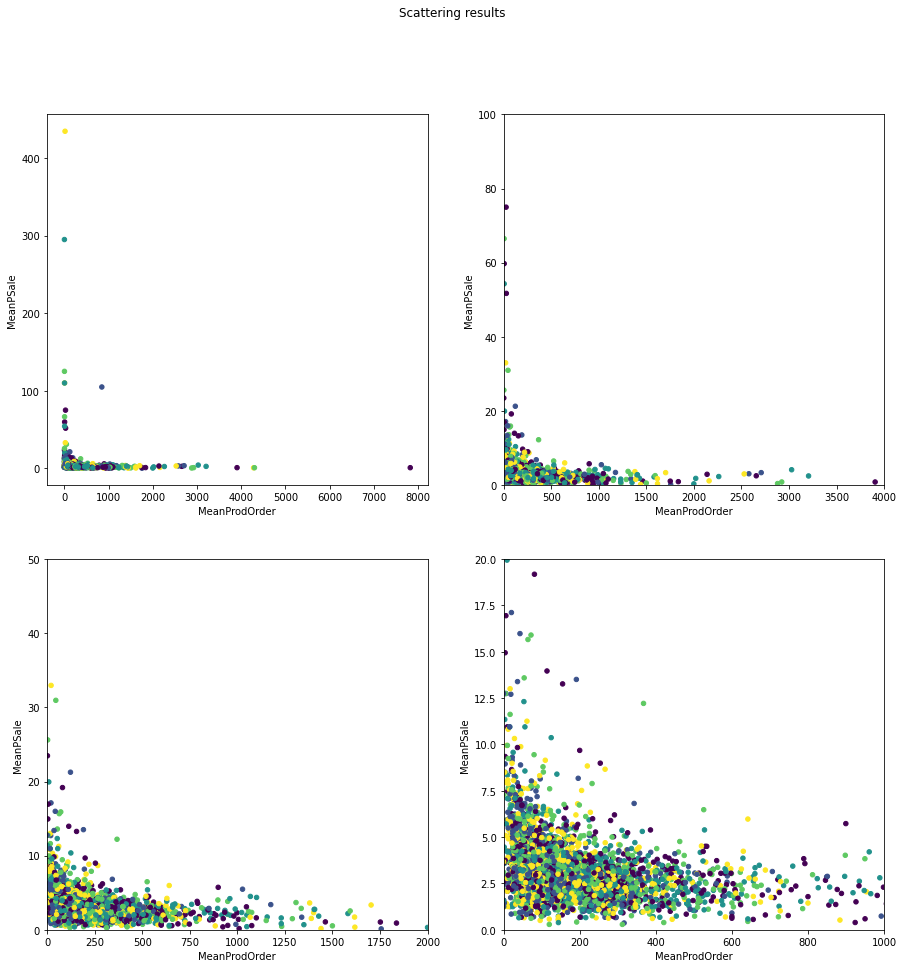

In [6]:
nc = 5
pc = 1000
cc = 50
mg = 5
mv, cl = ga_cluster(X, nc, cc, pc, mg)
clust_ord = calc_silhouette(X, cl)
plot_stats(mv, cl)
plot_dist(df_aux, clust_ord)